# Creación del dataset dsualmh

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 7 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 boiler

- 3 fan

- 4 freezer

- 5 television

- 6 vacuum cleaner



Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [2]:
from nilmtk.dataset_converters import convert_ualmt
convert_ualmt('./data/ozm1/', 'dsualmh.h5','2022-11-23','2022-11-23')


output_filename dsualmh.h5 format HDF
Path ualmt: ./data/ozm1/electricity

***********************************************************************************************
..Loading file    1 .csv
Filename  ./data/ozm1/electricity\1.csv
..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.669193e+12  18.1469 -7.76522  19.738554  50.0263  244.177  0.478618   
1      1.669193e+12  18.0288 -7.80309  19.644962  50.0265  244.154  0.496399   
2      1.669193e+12  17.4511 -7.68828  19.069609  50.0267  244.158  0.481039   
3      1.669193e+12  17.4225 -6.97172  18.765649  50.0265  244.174  0.488091   
4      1.669193e+12  17.8724 -7.14586  19.247978  50.0267  244.230  0.499596   
...             ...      ...      ...        ...      ...      ...       ...   
36663  1.669200e+12  17.3243 -6.63078  18.549885  50.0244  243.858  0.515264   
36664  1.669200e+12  17.2373 -6.33809  18.365611  50.0242  243.783  0.531090   
36665  1.669200e+12  17.1

.......Sorting index
physical_quantity                     power                      frequency  \
type                                 active reactive   apparent              
2022-11-23 09:42:37.532000+01:00  18.146900 -7.76522  19.738554  50.026299   
2022-11-23 09:42:37.732000+01:00  18.028799 -7.80309  19.644962  50.026501   
2022-11-23 09:42:37.932000+01:00  17.451099 -7.68828  19.069609  50.026699   
2022-11-23 09:42:38.132000+01:00  17.422501 -6.97172  18.765650  50.026501   
2022-11-23 09:42:38.332000+01:00  17.872400 -7.14586  19.247978  50.026699   
...                                     ...      ...        ...        ...   
2022-11-23 11:44:48.092000+01:00  17.324301 -6.63078  18.549885  50.024399   
2022-11-23 11:44:48.292000+01:00  17.237301 -6.33809  18.365610  50.024200   
2022-11-23 11:44:48.492000+01:00  17.174299 -7.26460  18.647585  50.024200   
2022-11-23 11:44:48.692000+01:00  18.080299 -7.08875  19.420267  50.024200   
2022-11-23 11:44:48.891000+01:00  17.356400

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.669193e+12  6.95467 -1.30684  7.076386  50.0484  245.475  0.775992   
1      1.669193e+12  7.06172 -2.07703  7.360840  50.0484  245.468  0.783664   
2      1.669193e+12  7.20207 -1.98814  7.471446  50.0482  245.460  0.751210   
3      1.669193e+12  7.54665 -1.63597  7.721938  50.0484  245.565  0.770578   
4      1.669193e+12  7.59132 -1.70459  7.780344  50.0486  245.475  0.787493   
...             ...      ...      ...       ...      ...      ...       ...   
36662  1.669200e+12  6.38994 -1.22404  6.506119  50.0377  245.167  0.747044   
36663  1.669200e+12  6.92924 -1.42049  7.073346  50.0377  245.088  0.816216   
36664  1.669200e+12  7.24096 -1.41069  7.377094  50.0379  245.058  0.841914   
36665  1.669200e+12  6.96076 -1.91653  7.219780  50.0382  245.103  0.776506   
36666  1.669200e+12  6.89090 -1.28539  7.009759  50.0382  245.065  0.811903   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-23 09:42:37.687000+01:00  6.95467 -1.30684  7.076386  50.048401   
2022-11-23 09:42:37.887000+01:00  7.06172 -2.07703  7.360840  50.048401   
2022-11-23 09:42:38.087000+01:00  7.20207 -1.98814  7.471446  50.048199   
2022-11-23 09:42:38.286000+01:00  7.54665 -1.63597  7.721938  50.048401   
2022-11-23 09:42:38.486000+01:00  7.59132 -1.70459  7.780344  50.048599   
...                                   ...      ...       ...        ...   
2022-11-23 11:44:48.034000+01:00  6.38994 -1.22404  6.506119  50.037701   
2022-11-23 11:44:48.234000+01:00  6.92924 -1.42049  7.073346  50.037701   
2022-11-23 11:44:48.434000+01:00  7.24096 -1.41069  7.377094  50.037899   
2022-11-23 11:44:48.634000+01:00  6.96076 -1.91653  7.219780  50.038200   
2022-11-23 11:44:48.834000+01:00  6.89090 -1.28539  7.009759  50.038200   

phy

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.669193e+12  5.66658 -2.32157  6.123708  50.0484  245.475  0.659994   
1      1.669193e+12  4.93710 -2.43828  5.506378  50.0484  245.468  0.627613   
2      1.669193e+12  5.40088 -1.93958  5.738590  50.0482  245.460  0.485863   
3      1.669193e+12  6.02163 -1.99822  6.344523  50.0484  245.565  0.691281   
4      1.669193e+12  6.30762 -2.53335  6.797353  50.0486  245.475  0.700240   
...             ...      ...      ...       ...      ...      ...       ...   
36661  1.669200e+12  4.83813 -1.86680  5.185796  50.0377  245.167  0.478132   
36662  1.669200e+12  4.74218 -1.89230  5.105786  50.0377  245.088  0.624250   
36663  1.669200e+12  5.30949 -1.58756  5.541752  50.0379  245.058  0.752917   
36664  1.669200e+12  5.19370 -2.11856  5.609175  50.0382  245.103  0.602230   
36665  1.669200e+12  4.95553 -1.74952  5.255297  50.0382  245.065  0.652935   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-23 09:42:37.687000+01:00  5.66658 -2.32157  6.123708  50.048401   
2022-11-23 09:42:37.887000+01:00  4.93710 -2.43828  5.506378  50.048401   
2022-11-23 09:42:38.087000+01:00  5.40088 -1.93958  5.738590  50.048199   
2022-11-23 09:42:38.286000+01:00  6.02163 -1.99822  6.344522  50.048401   
2022-11-23 09:42:38.486000+01:00  6.30762 -2.53335  6.797353  50.048599   
...                                   ...      ...       ...        ...   
2022-11-23 11:44:48.034000+01:00  4.83813 -1.86680  5.185796  50.037701   
2022-11-23 11:44:48.234000+01:00  4.74218 -1.89230  5.105786  50.037701   
2022-11-23 11:44:48.434000+01:00  5.30949 -1.58756  5.541752  50.037899   
2022-11-23 11:44:48.634000+01:00  5.19370 -2.11856  5.609175  50.038200   
2022-11-23 11:44:48.834000+01:00  4.95553 -1.74952  5.255297  50.038200   

phy

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.669193e+12  3.27461 -2.80502  4.311753  50.0263  244.177  0.380732   
1      1.669193e+12  3.42282 -2.96072  4.525654  50.0265  244.154  0.396170   
2      1.669193e+12  3.23573 -2.69186  4.209040  50.0267  244.158  0.400282   
3      1.669193e+12  3.24093 -3.12198  4.500039  50.0265  244.174  0.343105   
4      1.669193e+12  3.61389 -3.17577  4.810999  50.0267  244.230  0.407046   
...             ...      ...      ...       ...      ...      ...       ...   
36661  1.669200e+12  2.19842 -3.35737  4.013103  50.0244  243.858  0.300871   
36662  1.669200e+12  2.56979 -3.60987  4.431137  50.0242  243.783  0.312544   
36663  1.669200e+12  3.57967 -3.31417  4.878293  50.0242  243.784  0.428809   
36664  1.669200e+12  2.80670 -2.91867  4.049224  50.0242  243.815  0.362685   
36665  1.669200e+12  2.44390 -2.77699  3.699235  50.0242  243.764  0.318511   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-23 09:42:37.532000+01:00  3.27461 -2.80502  4.311753  50.026299   
2022-11-23 09:42:37.732000+01:00  3.42282 -2.96072  4.525654  50.026501   
2022-11-23 09:42:37.932000+01:00  3.23573 -2.69186  4.209040  50.026699   
2022-11-23 09:42:38.132000+01:00  3.24093 -3.12198  4.500039  50.026501   
2022-11-23 09:42:38.332000+01:00  3.61389 -3.17577  4.810999  50.026699   
...                                   ...      ...       ...        ...   
2022-11-23 11:44:48.092000+01:00  2.19842 -3.35737  4.013103  50.024399   
2022-11-23 11:44:48.292000+01:00  2.56979 -3.60987  4.431138  50.024200   
2022-11-23 11:44:48.492000+01:00  3.57967 -3.31417  4.878293  50.024200   
2022-11-23 11:44:48.692000+01:00  2.80670 -2.91867  4.049224  50.024200   
2022-11-23 11:44:48.891000+01:00  2.44390 -2.77699  3.699235  50.024200   

phy

physical_quantity             power                      frequency  \
type                         active  reactive  apparent              
2022-11-23 09:42:37+01:00  3.311053 -2.819200  4.348816  50.026501   
2022-11-23 09:42:38+01:00  3.224916 -3.009866  4.416190  50.026741   
2022-11-23 09:42:39+01:00  3.037626 -2.927656  4.221698  50.027061   
2022-11-23 09:42:40+01:00  3.240672 -2.852438  4.331031  50.027382   
2022-11-23 09:42:41+01:00  3.183706 -3.170580  4.500410  50.027538   
...                             ...       ...       ...        ...   
2022-11-23 11:44:44+01:00  2.902742 -2.600124  3.975312  50.023880   
2022-11-23 11:44:45+01:00  2.568424 -3.305162  4.212407  50.023682   
2022-11-23 11:44:46+01:00  2.847122 -2.962190  4.118191  50.023720   
2022-11-23 11:44:47+01:00  3.023800 -2.904142  4.216503  50.023960   
2022-11-23 11:44:48+01:00  2.719696 -3.195414  4.214199  50.024239   

physical_quantity             voltage        pf   current     voltage  \
type            

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-23 09:42:37.687000+01:00  7.98204 -2.09615  8.252689  50.0484   
2022-11-23 09:42:37.887000+01:00  8.06309 -2.77598  8.527573  50.0484   
2022-11-23 09:42:38.086000+01:00  8.33182 -2.23784  8.627120  50.0482   
2022-11-23 09:42:38.286000+01:00  8.15230 -1.72031  8.331832  50.0484   
2022-11-23 09:42:38.486000+01:00  8.26126 -1.95911  8.490383  50.0486   
...                                   ...      ...       ...      ...   
2022-11-23 11:44:48.034000+01:00  7.17304 -1.88160  7.415724  50.0377   
2022-11-23 11:44:48.234000+01:00  7.58746 -1.98281  7.842262  50.0377   
2022-11-23 11:44:48.434000+01:00  7.34563 -1.61929  7.521995  50.0379   
2022-11-23 11:44:48.634000+01:00  6.70888 -1.77225  6.939015  50.0382   
2022-11-23 11:44:48.834000+01:00  7.19958 -1.96121  7.461920  50.0382   

                                      VLN        PF         A         VH1  \
2022-11-23 09:42:37.68

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-23 09:42:37.687000+01:00  7.98204 -2.09615  8.252689  50.048401   
2022-11-23 09:42:37.887000+01:00  8.06309 -2.77598  8.527574  50.048401   
2022-11-23 09:42:38.086000+01:00  8.33182 -2.23784  8.627120  50.048199   
2022-11-23 09:42:38.286000+01:00  8.15230 -1.72031  8.331832  50.048401   
2022-11-23 09:42:38.486000+01:00  8.26126 -1.95911  8.490383  50.048599   
...                                   ...      ...       ...        ...   
2022-11-23 11:44:48.034000+01:00  7.17304 -1.88160  7.415723  50.037701   
2022-11-23 11:44:48.234000+01:00  7.58746 -1.98281  7.842262  50.037701   
2022-11-23 11:44:48.434000+01:00  7.34563 -1.61929  7.521995  50.037899   
2022-11-23 11:44:48.634000+01:00  6.70888 -1.77225  6.939015  50.038200   
2022-11-23 11:44:48.834000+01:00  7.19958 -1.96121  7.461920  50.038200   

phy

physical_quantity             power                      frequency  \
type                         active  reactive  apparent              
2022-11-23 09:42:37+01:00  8.022565 -2.436065  8.390131  50.048401   
2022-11-23 09:42:38+01:00  8.201234 -1.955226  8.432961  50.048519   
2022-11-23 09:42:39+01:00  7.934630 -2.028178  8.199463  50.046101   
2022-11-23 09:42:40+01:00  8.481362 -1.902111  8.719223  50.042881   
2022-11-23 09:42:41+01:00  7.990514 -2.189230  8.289274  50.042179   
...                             ...       ...       ...        ...   
2022-11-23 11:44:44+01:00  7.524838 -2.021184  7.796893  50.037182   
2022-11-23 11:44:45+01:00  7.544462 -2.047512  7.821669  50.036819   
2022-11-23 11:44:46+01:00  7.554184 -1.883482  7.790093  50.037102   
2022-11-23 11:44:47+01:00  7.505002 -1.857376  7.734648  50.037182   
2022-11-23 11:44:48+01:00  7.202918 -1.843432  7.436183  50.037941   

physical_quantity             voltage        pf   current     voltage  \
type            

Conversion of timestamp
                                        W       VAR        VA        f  \
2022-11-23 09:42:37.687000+01:00  4.83074 -0.797672  4.896158  50.0484   
2022-11-23 09:42:37.887000+01:00  5.08719 -1.076530  5.199853  50.0484   
2022-11-23 09:42:38.086000+01:00  4.22217 -0.160628  4.225222  50.0482   
2022-11-23 09:42:38.286000+01:00  4.64813 -0.847062  4.724682  50.0484   
2022-11-23 09:42:38.486000+01:00  4.91784 -0.989734  5.016446  50.0486   
...                                   ...       ...       ...      ...   
2022-11-23 11:44:48.034000+01:00  5.24793 -0.771236  5.304297  50.0377   
2022-11-23 11:44:48.234000+01:00  4.17331 -1.501050  4.435052  50.0377   
2022-11-23 11:44:48.434000+01:00  5.22965 -0.873218  5.302051  50.0379   
2022-11-23 11:44:48.634000+01:00  3.78970 -1.173150  3.967128  50.0382   
2022-11-23 11:44:48.834000+01:00  4.53963 -1.013980  4.651489  50.0382   

                                      VLN        PF         A         VH1  \
2022-11-23

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2022-11-23 09:42:37.687000+01:00  4.83074 -0.797672  4.896158  50.048401   
2022-11-23 09:42:37.887000+01:00  5.08719 -1.076530  5.199852  50.048401   
2022-11-23 09:42:38.086000+01:00  4.22217 -0.160628  4.225222  50.048199   
2022-11-23 09:42:38.286000+01:00  4.64813 -0.847062  4.724682  50.048401   
2022-11-23 09:42:38.486000+01:00  4.91784 -0.989734  5.016446  50.048599   
...                                   ...       ...       ...        ...   
2022-11-23 11:44:48.034000+01:00  5.24793 -0.771236  5.304297  50.037701   
2022-11-23 11:44:48.234000+01:00  4.17331 -1.501050  4.435051  50.037701   
2022-11-23 11:44:48.434000+01:00  5.22965 -0.873218  5.302052  50.037899   
2022-11-23 11:44:48.634000+01:00  3.78970 -1.173150  3.967128  50.038200   
2022-11-23 11:44:48.834000+01:00  4.53963 -1.013980  4.651489  50.0

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.669193e+12  7.26076 -4.20891  8.392471  50.0263  244.177  0.592731   
1      1.669193e+12  7.71677 -4.30230  8.835065  50.0265  244.154  0.663013   
2      1.669193e+12  8.08755 -4.35085  9.183592  50.0267  244.158  0.685764   
3      1.669193e+12  7.04813 -4.01364  8.110822  50.0265  244.174  0.598490   
4      1.669193e+12  7.74329 -3.72593  8.593085  50.0267  244.230  0.668711   
...             ...      ...      ...       ...      ...      ...       ...   
36663  1.669200e+12  6.58425 -4.35622  7.894876  50.0244  243.858  0.473764   
36664  1.669200e+12  6.73446 -3.94052  7.802607  50.0242  243.783  0.494919   
36665  1.669200e+12  6.94072 -4.27513  8.151708  50.0242  243.784  0.637441   
36666  1.669200e+12  6.10856 -4.11638  7.366081  50.0242  243.815  0.608125   
36667  1.669200e+12  6.04372 -4.11678  7.312623  50.0242  243.764  0.629339   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-23 09:42:37.532000+01:00  7.26076 -4.20891  8.392471  50.026299   
2022-11-23 09:42:37.732000+01:00  7.71677 -4.30230  8.835065  50.026501   
2022-11-23 09:42:37.932000+01:00  8.08755 -4.35085  9.183592  50.026699   
2022-11-23 09:42:38.132000+01:00  7.04813 -4.01364  8.110822  50.026501   
2022-11-23 09:42:38.332000+01:00  7.74329 -3.72593  8.593085  50.026699   
...                                   ...      ...       ...        ...   
2022-11-23 11:44:48.092000+01:00  6.58425 -4.35622  7.894876  50.024399   
2022-11-23 11:44:48.292000+01:00  6.73446 -3.94052  7.802607  50.024200   
2022-11-23 11:44:48.492000+01:00  6.94072 -4.27513  8.151708  50.024200   
2022-11-23 11:44:48.692000+01:00  6.10856 -4.11638  7.366081  50.024200   
2022-11-23 11:44:48.891000+01:00  6.04372 -4.11678  7.312623  50.024200   

phy

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.669193e+12  8.27675 -3.53433  8.999780  50.0557  243.863  0.809088   
1      1.669193e+12  8.24653 -3.17252  8.835732  50.0557  243.875  0.827492   
2      1.669193e+12  7.87127 -4.01732  8.837182  50.0555  243.881  0.745084   
3      1.669193e+12  7.27411 -3.04749  7.886688  50.0542  243.985  0.771719   
4      1.669193e+12  8.43077 -2.86791  8.905210  50.0542  243.794  0.839174   
...             ...      ...      ...       ...      ...      ...       ...   
36629  1.669200e+12  7.66915 -2.35630  8.022963  50.0405  243.455  0.788130   
36630  1.669200e+12  7.18479 -2.44022  7.587879  50.0407  243.501  0.708870   
36631  1.669200e+12  7.09228 -2.49038  7.516804  50.0409  243.373  0.735203   
36632  1.669200e+12  7.83475 -2.38299  8.189140  50.0417  243.706  0.794924   
36633  1.669200e+12  7.11546 -2.01037  7.394005  50.0419  243.545  0.780931   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-23 09:42:37.644000+01:00  8.27675 -3.53433  8.999780  50.055698   
2022-11-23 09:42:37.844000+01:00  8.24653 -3.17252  8.835732  50.055698   
2022-11-23 09:42:38.043000+01:00  7.87127 -4.01732  8.837182  50.055500   
2022-11-23 09:42:38.243000+01:00  7.27411 -3.04749  7.886688  50.054199   
2022-11-23 09:42:38.443000+01:00  8.43077 -2.86791  8.905210  50.054199   
...                                   ...      ...       ...        ...   
2022-11-23 11:44:48.108000+01:00  7.66915 -2.35630  8.022964  50.040501   
2022-11-23 11:44:48.308000+01:00  7.18479 -2.44022  7.587879  50.040699   
2022-11-23 11:44:48.508000+01:00  7.09228 -2.49038  7.516804  50.040901   
2022-11-23 11:44:48.708000+01:00  7.83475 -2.38299  8.189139  50.041698   
2022-11-23 11:44:48.908000+01:00  7.11546 -2.01037  7.394005  50.041901   

phy

physical_quantity             power                      frequency  \
type                         active  reactive  apparent              
2022-11-23 09:42:37+01:00  8.261640 -3.353425  8.917756  50.055698   
2022-11-23 09:42:38+01:00  7.973274 -3.134924  8.580359  50.054581   
2022-11-23 09:42:39+01:00  8.147924 -3.218770  8.762921  50.056358   
2022-11-23 09:42:40+01:00  8.048518 -3.103774  8.633279  50.058399   
2022-11-23 09:42:41+01:00  8.249068 -3.297510  8.886698  50.055962   
...                             ...       ...       ...        ...   
2022-11-23 11:44:44+01:00  7.591814 -2.521810  8.004866  50.043522   
2022-11-23 11:44:45+01:00  7.313850 -2.490658  7.729513  50.041561   
2022-11-23 11:44:46+01:00  7.341342 -2.550770  7.774399  50.039742   
2022-11-23 11:44:47+01:00  7.212854 -2.460518  7.624587  50.039539   
2022-11-23 11:44:48+01:00  7.379286 -2.336052  7.742158  50.041142   

physical_quantity             voltage        pf   current     voltage  \
type            

Conversion of timestamp
                                        W      VAR         VA        f  \
2022-11-23 09:42:37.644000+01:00  9.30515 -3.05198   9.792872  50.0557   
2022-11-23 09:42:37.844000+01:00  9.35900 -3.15745   9.877263  50.0557   
2022-11-23 09:42:38.043000+01:00  9.43013 -4.04919  10.262714  50.0555   
2022-11-23 09:42:38.243000+01:00  9.45167 -2.79094   9.855118  50.0542   
2022-11-23 09:42:38.443000+01:00  9.27625 -3.17387   9.804199  50.0542   
...                                   ...      ...        ...      ...   
2022-11-23 11:44:48.108000+01:00  7.51231 -4.36167   8.686712  50.0405   
2022-11-23 11:44:48.308000+01:00  8.36628 -3.15547   8.941568  50.0407   
2022-11-23 11:44:48.508000+01:00  7.78996 -3.25758   8.443657  50.0409   
2022-11-23 11:44:48.708000+01:00  7.60956 -2.74075   8.088081  50.0417   
2022-11-23 11:44:48.908000+01:00  7.61730 -3.32356   8.310798  50.0419   

                                      VLN        PF         A         VH1  \
2022-11-23

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active reactive   apparent              
2022-11-23 09:42:37.644000+01:00  9.30515 -3.05198   9.792872  50.055698   
2022-11-23 09:42:37.844000+01:00  9.35900 -3.15745   9.877263  50.055698   
2022-11-23 09:42:38.043000+01:00  9.43013 -4.04919  10.262714  50.055500   
2022-11-23 09:42:38.243000+01:00  9.45167 -2.79094   9.855119  50.054199   
2022-11-23 09:42:38.443000+01:00  9.27625 -3.17387   9.804199  50.054199   
...                                   ...      ...        ...        ...   
2022-11-23 11:44:48.108000+01:00  7.51231 -4.36167   8.686712  50.040501   
2022-11-23 11:44:48.308000+01:00  8.36628 -3.15547   8.941568  50.040699   
2022-11-23 11:44:48.508000+01:00  7.78996 -3.25758   8.443657  50.040901   
2022-11-23 11:44:48.708000+01:00  7.60956 -2.74075   8.088081  50.041698   
2022-11-23 11:44:48.908000+01:00  7.61730 -3.32356   8.310798  50.0

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.669193e+12  7.04711 -1.47633  7.200090  50.0557  243.863  0.846516   
1      1.669193e+12  6.65446 -1.84915  6.906599  50.0557  243.875  0.811381   
2      1.669193e+12  6.89584 -2.12983  7.217255  50.0555  243.881  0.791482   
3      1.669193e+12  6.83691 -2.11134  7.155499  50.0542  243.985  0.730922   
4      1.669193e+12  7.37744 -1.97152  7.636326  50.0542  243.794  0.761249   
...             ...      ...      ...       ...      ...      ...       ...   
36630  1.669200e+12  7.93003 -2.05514  8.192003  50.0405  243.455  0.801880   
36631  1.669200e+12  7.61461 -2.17145  7.918178  50.0407  243.501  0.720661   
36632  1.669200e+12  7.75611 -2.34260  8.102158  50.0409  243.373  0.732765   
36633  1.669200e+12  7.88848 -2.56270  8.294307  50.0417  243.706  0.764929   
36634  1.669200e+12  7.53864 -1.94331  7.785084  50.0419  243.545  0.773919   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-23 09:42:37.644000+01:00  7.04711 -1.47633  7.200090  50.055698   
2022-11-23 09:42:37.844000+01:00  6.65446 -1.84915  6.906599  50.055698   
2022-11-23 09:42:38.043000+01:00  6.89584 -2.12983  7.217255  50.055500   
2022-11-23 09:42:38.243000+01:00  6.83691 -2.11134  7.155499  50.054199   
2022-11-23 09:42:38.443000+01:00  7.37744 -1.97152  7.636326  50.054199   
...                                   ...      ...       ...        ...   
2022-11-23 11:44:48.108000+01:00  7.93003 -2.05514  8.192003  50.040501   
2022-11-23 11:44:48.308000+01:00  7.61461 -2.17145  7.918178  50.040699   
2022-11-23 11:44:48.508000+01:00  7.75611 -2.34260  8.102159  50.040901   
2022-11-23 11:44:48.708000+01:00  7.88848 -2.56270  8.294308  50.041698   
2022-11-23 11:44:48.908000+01:00  7.53864 -1.94331  7.785084  50.041901   

phy

..Reading file csv
          timestamp         W        VAR         VA        f      VLN  \
0      1.669193e+12 -11.04200 -29.277900  31.290857  50.0557  243.863   
1      1.669193e+12 -16.01950 -20.631400  26.120480  50.0557  243.875   
2      1.669193e+12 -13.63000  -3.431680  14.055352  50.0555  243.881   
3      1.669193e+12 -24.33590  -8.418480  25.750892  50.0542  243.985   
4      1.669193e+12 -22.04060 -16.383900  27.463118  50.0542  243.794   
...             ...       ...        ...        ...      ...      ...   
36630  1.669200e+12 -18.87890 -14.242100  23.648461  50.0405  243.455   
36631  1.669200e+12  -5.59994  -0.257568   5.605859  50.0407  243.501   
36632  1.669200e+12 -24.71790  -9.675510  26.544089  50.0409  243.373   
36633  1.669200e+12 -15.80400  -3.257140  16.136196  50.0417  243.706   
36634  1.669200e+12 -10.86450   4.187550  11.643586  50.0419  243.545   

             PF        A         VH1       VH2  ...      PH41      PH42  \
0     -0.035948  1.25957  243

.......Sorting index
physical_quantity                     power                        frequency  \
type                                 active   reactive   apparent              
2022-11-23 09:42:37.644000+01:00 -11.042000 -29.277901  31.290857  50.055698   
2022-11-23 09:42:37.844000+01:00 -16.019501 -20.631399  26.120480  50.055698   
2022-11-23 09:42:38.043000+01:00 -13.630000  -3.431680  14.055351  50.055500   
2022-11-23 09:42:38.243000+01:00 -24.335899  -8.418480  25.750893  50.054199   
2022-11-23 09:42:38.443000+01:00 -22.040600 -16.383900  27.463118  50.054199   
...                                     ...        ...        ...        ...   
2022-11-23 11:44:48.108000+01:00 -18.878901 -14.242100  23.648460  50.040501   
2022-11-23 11:44:48.308000+01:00  -5.599940  -0.257568   5.605859  50.040699   
2022-11-23 11:44:48.508000+01:00 -24.717899  -9.675510  26.544088  50.040901   
2022-11-23 11:44:48.708000+01:00 -15.804000  -3.257140  16.136196  50.041698   
2022-11-23 11:44:48

physical_quantity              power                        frequency  \
type                          active   reactive   apparent              
2022-11-23 09:42:37+01:00 -13.530750 -24.954651  28.705669  50.055698   
2022-11-23 09:42:38+01:00 -19.120260  -9.305424  21.461523  50.054581   
2022-11-23 09:42:39+01:00  -7.323244  -6.509572  16.422134  50.056358   
2022-11-23 09:42:40+01:00 -10.817841 -21.070179  26.768635  50.058399   
2022-11-23 09:42:41+01:00 -12.161116  -8.253134  17.480663  50.055962   
...                              ...        ...        ...        ...   
2022-11-23 11:44:44+01:00  -0.275218  -7.927036  15.859009  50.043522   
2022-11-23 11:44:45+01:00 -17.944431  -2.995042  22.946440  50.041561   
2022-11-23 11:44:46+01:00  -0.413222  -4.753957  12.980969  50.039742   
2022-11-23 11:44:47+01:00 -16.126579   2.437250  16.767899  50.039539   
2022-11-23 11:44:48+01:00 -15.173048  -4.648953  16.715637  50.041142   

physical_quantity             voltage        pf   

Convertidos los metadatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsualmh.h5 que contiene los datos recopilados y metadatos del dataset.

In [2]:
#dataset de referencia 
dsualmh = DataSet('dsualmh.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [3]:
elec = dsualmh.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)]

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [4]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [5]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [6]:
elec.mains().power_series_all_data().head()

2022-11-23 09:42:37+01:00    17.875599
2022-11-23 09:42:38+01:00    17.754761
2022-11-23 09:42:39+01:00    17.883940
2022-11-23 09:42:40+01:00    18.888660
2022-11-23 09:42:41+01:00    17.919119
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [7]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='dsualmh', appliances=[Appliance(ty

### Etiquetas de dispositivos

Tenenos 11 medidores, por lo que podemos asociarle una etiqueta para identificarlos biunivocamente. 

In [8]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [9]:
print_dict(dsualmh.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [10]:
print_dict(dsualmh.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [11]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]
print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[8].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[9].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[10].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[11].get_metadata()) #metadatos de ElecMeter 5 o elec[5]





# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [12]:
boiler_meter = elec['kettle']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [13]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [14]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': 'armonic1',
   'upper_limit': 100,
   'lower_limit': 0},
  {

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [15]:
boiler_meter.dominant_appliance()

Appliance(type='kettle', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [16]:
boiler_meter.total_energy() # kWh

active      0.591680
apparent    0.592807
reactive    0.002462
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [17]:
next(boiler_meter.load())

physical_quantity           voltage   current                       voltage  \
type                      armonic16 armonic44 armonic49 armonic34 armonic13   
2022-11-23 09:42:37+01:00  0.016904  0.000293  0.000779  0.000525  0.606283   
2022-11-23 09:42:38+01:00  0.016322  0.000969  0.000510  0.000733  0.633493   
2022-11-23 09:42:39+01:00  0.010953  0.000510  0.000367  0.000414  0.627322   
2022-11-23 09:42:40+01:00  0.014550  0.001525  0.000745  0.001572  0.595721   
2022-11-23 09:42:41+01:00  0.014218  0.000380  0.000696  0.000761  0.617019   
...                             ...       ...       ...       ...       ...   
2022-11-23 11:44:44+01:00  0.017330  0.000158  0.000334  0.000459  0.776084   
2022-11-23 11:44:45+01:00  0.011451  0.000493  0.000309  0.000346  0.770311   
2022-11-23 11:44:46+01:00  0.010869  0.000489  0.000513  0.000423  0.768273   
2022-11-23 11:44:47+01:00  0.015472  0.000464  0.000556  0.000577  0.756700   
2022-11-23 11:44:48+01:00  0.011515  0.000296  0.000445  0.000430  0.764421   

physical_quantity                       power                      \
type                      armonic32  armonic2  armonic3 armonic27   
2022-11-23 09:42:37+01:00  0.011851  0.000038  0.001648  0.000011   
2022-11-23 09:42:38+01:00  0.007552  0.000146  0.002102  0.000010   
2022-11-23 09:42:39+01:00  0.006877  0.000069  0.001410  0.000012   
2022-11-23 09:42:40+01:00  0.009814 -0.000281  0.001509  0.000034   
2022-11-23 09:42:41+01:00  0.009660  0.000135  0.002364  0.000020   
...                             ...       ...       ...       ...   
2022-11-23 11:44:44+01:00  0.005737  0.000009  0.001451 -0.000002   
2022-11-23 11:44:45+01:00  0.006830 -0.000023  0.001221  0.000002   
2022-11-23 11:44:46+01:00  0.010686  0.000018  0.001517  0.000008   
2022-11-23 11:44:47+01:00  0.007526  0.000015  0.001243 -0.000004   
2022-11-23 11:44:48+01:00  0.008284 -0.000009  0.002101  0.000002   

physical_quantity                        ...   current   voltage     power  \
type                          armonic46  ... armonic29 armonic19 armonic43   
2022-11-23 09:42:37+01:00  5.000000e-06  ...  0.000556  0.219391 -0.000004   
2022-11-23 09:42:38+01:00  2.400000e-06  ...  0.000562  0.201391 -0.000004   
2022-11-23 09:42:39+01:00 -1.400000e-06  ...  0.000430  0.196603 -0.000007   
2022-11-23 09:42:40+01:00 -3.000000e-06  ...  0.002313  0.211538  0.000005   
2022-11-23 09:42:41+01:00  6.000000e-07  ...  0.000759  0.202373 -0.000007   
...                                 ...  ...       ...       ...       ...   
2022-11-23 11:44:44+01:00  1.200000e-06  ...  0.000399  0.302277  0.000002   
2022-11-23 11:44:45+01:00  2.400000e-06  ...  0.000629  0.285790 -0.000009   
2022-11-23 11:44:46+01:00  1.800000e-06  ...  0.000338  0.289531 -0.000007   
2022-11-23 11:44:47+01:00  1.400000e-06  ...  0.000671  0.267827 -0.000004   
2022-11-23 11:44:48+01:00 -4.000000e-07  ...  0.000741  0.272074 -0.000004   

physical_quantity                     current     power             current  \
type                      armonic13 armonic23 armonic23 armonic35 armonic43   
2022-11-23 09:42:37+01:00 -0.000242  0.000413 -0.000029  0.000020  0.000587   
2022-11-23 09:42:38+01:00 -0.000180  0.000930 -0.000125  0.000012  0.000815   
2022-11-23 09:42:39+01:00 -0.000267  0.000371 -0.000037  0.000005  0.000497   
2022-11-23 09:42:40+01:00 -0.000260  0.001884  0.000047 -0.000019  0.001681   
2022-11-23 09:42:41+01:00 -0.000117  0.000654 -0.000013  0.000007  0.000483   
...                             ...       ...       ...       ...       ...   
2022-11-23 11:44:44+01:00 -0.000330  0.000514 -0.000015  0.000006  0.000260   
2022-11-23 11:44:45+01:00 -0.000136  0.000493 -0.000082  0.000012  0.000351   
2022-11-23 11:44:46+01:00 -0.000072  0.000537 -0.000084  0.000008  0.000287   
2022-11-23 11:44:47+01:00  0.000027  0.000547 -0.000040  0.000009  0.000520   
2022-11-23 11:44:48+01:00 -0.000229  0.000846 -0.000019  0.000002  0.000266   

physical_quantity              

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [18]:
next (boiler_meter.power_series())

2022-11-23 09:42:37+01:00    8.022565
2022-11-23 09:42:38+01:00    8.201234
2022-11-23 09:42:39+01:00    7.934630
2022-11-23 09:42:40+01:00    8.481362
2022-11-23 09:42:41+01:00    7.990514
                               ...   
2022-11-23 11:44:44+01:00    7.524838
2022-11-23 11:44:45+01:00    7.544462
2022-11-23 11:44:46+01:00    7.554184
2022-11-23 11:44:47+01:00    7.505002
2022-11-23 11:44:48+01:00    7.202918
Name: (power, active), Length: 7332, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

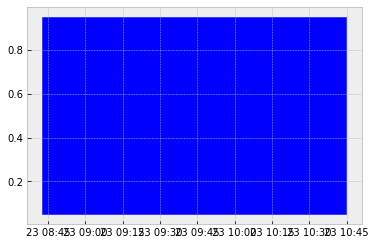

In [19]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [20]:
good_sections.combined()

[TimeFrame(start='2022-11-23 09:42:37+01:00', end='2022-11-23 11:44:48+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [21]:
boiler_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALMH::

In [22]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [23]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [24]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='dsualmh', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [25]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['frequency', 'pf', 'power', 'current', 'voltage']

In [26]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['frequency', 'pf', 'power', 'current', 'voltage']

In [27]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (horno)


['frequency', 'pf', 'power', 'current', 'voltage']

In [28]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (micro)


['frequency', 'pf', 'power', 'current', 'voltage']

In [29]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (tv)


['frequency', 'pf', 'power', 'current', 'voltage']

In [30]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (hervidor)


['frequency', 'pf', 'power', 'current', 'voltage']

In [31]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (aspiradora)


['frequency', 'pf', 'power', 'current', 'voltage']

In [32]:
elec[7].available_physical_quantities() #medidas de ElecMeter 7 (estufa)

['frequency', 'pf', 'power', 'current', 'voltage']

In [33]:
elec[8].available_physical_quantities() #medidas de ElecMeter 8 (calentador)

['frequency', 'pf', 'power', 'current', 'voltage']

In [34]:
elec[9].available_physical_quantities() #medidas de ElecMeter 9 (ventilador)

['frequency', 'pf', 'power', 'current', 'voltage']

In [35]:
elec[10].available_physical_quantities() #medidas de ElecMeter 10 (nevera)

['frequency', 'pf', 'power', 'current', 'voltage']

In [36]:
elec[11].available_physical_quantities() #medidas de ElecMeter 6 (congelador)

['frequency', 'pf', 'power', 'current', 'voltage']

## Medidas disponibles relativas a la potencia


In [37]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [38]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [39]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [40]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [41]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [42]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [43]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 7

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [44]:
elec[8].available_ac_types('power') #medidas de potencia de ElecMeter 8

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [45]:
elec[9].available_ac_types('power') #medidas de potencia de ElecMeter 9

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [46]:
elec[10].available_ac_types('power') #medidas de potencia de ElecMeter 10

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [47]:
elec[11].available_ac_types('power') #medidas de potencia de ElecMeter 11

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [48]:
fan = elec['fan']
fan.available_columns()

[('voltage', 'armonic16'),
 ('current', 'armonic44'),
 ('current', 'armonic49'),
 ('current', 'armonic34'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic32'),
 ('power', 'armonic2'),
 ('power', 'armonic3'),
 ('power', 'armonic27'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('voltage', 'armonic25'),
 ('power', 'armonic11'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic49'),
 ('power', 'armonic19'),
 ('current', 'armonic26'),
 ('power', 'armonic38'),
 ('voltage', 'armonic2'),
 ('current', 'armonic7'),
 ('current', 'armonic24'),
 ('voltage', 'armonic27'),
 ('current', 'armonic37'),
 ('voltage', 'armonic46'),
 ('current', 'armonic4'),
 ('power', 'armonic6'),
 ('voltage', 'armonic42'),
 ('current', 'armonic21'),
 ('voltage', 'armonic45'),
 ('current', 'armonic32'),
 ('voltage', 'armonic31'),
 ('current', 'armonic33'),
 ('power', 'armonic10'),
 ('current', 'armonic50'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic7'),
 ('

In [49]:
kettle = elec['kettle']
kettle.available_columns()

[('voltage', 'armonic16'),
 ('current', 'armonic44'),
 ('current', 'armonic49'),
 ('current', 'armonic34'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic32'),
 ('power', 'armonic2'),
 ('power', 'armonic3'),
 ('power', 'armonic27'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('voltage', 'armonic25'),
 ('power', 'armonic11'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic49'),
 ('power', 'armonic19'),
 ('current', 'armonic26'),
 ('power', 'armonic38'),
 ('voltage', 'armonic2'),
 ('current', 'armonic7'),
 ('current', 'armonic24'),
 ('voltage', 'armonic27'),
 ('current', 'armonic37'),
 ('voltage', 'armonic46'),
 ('current', 'armonic4'),
 ('power', 'armonic6'),
 ('voltage', 'armonic42'),
 ('current', 'armonic21'),
 ('voltage', 'armonic45'),
 ('current', 'armonic32'),
 ('voltage', 'armonic31'),
 ('current', 'armonic33'),
 ('power', 'armonic10'),
 ('current', 'armonic50'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic7'),
 ('

In [50]:
fan = elec['fan']
fan.available_columns()

[('voltage', 'armonic16'),
 ('current', 'armonic44'),
 ('current', 'armonic49'),
 ('current', 'armonic34'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic32'),
 ('power', 'armonic2'),
 ('power', 'armonic3'),
 ('power', 'armonic27'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('voltage', 'armonic25'),
 ('power', 'armonic11'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic49'),
 ('power', 'armonic19'),
 ('current', 'armonic26'),
 ('power', 'armonic38'),
 ('voltage', 'armonic2'),
 ('current', 'armonic7'),
 ('current', 'armonic24'),
 ('voltage', 'armonic27'),
 ('current', 'armonic37'),
 ('voltage', 'armonic46'),
 ('current', 'armonic4'),
 ('power', 'armonic6'),
 ('voltage', 'armonic42'),
 ('current', 'armonic21'),
 ('voltage', 'armonic45'),
 ('current', 'armonic32'),
 ('voltage', 'armonic31'),
 ('current', 'armonic33'),
 ('power', 'armonic10'),
 ('current', 'armonic50'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic7'),
 ('

In [51]:
television = elec['television']
television.available_columns()

[('voltage', 'armonic16'),
 ('current', 'armonic44'),
 ('current', 'armonic49'),
 ('current', 'armonic34'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic32'),
 ('power', 'armonic2'),
 ('power', 'armonic3'),
 ('power', 'armonic27'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('voltage', 'armonic25'),
 ('power', 'armonic11'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic49'),
 ('power', 'armonic19'),
 ('current', 'armonic26'),
 ('power', 'armonic38'),
 ('voltage', 'armonic2'),
 ('current', 'armonic7'),
 ('current', 'armonic24'),
 ('voltage', 'armonic27'),
 ('current', 'armonic37'),
 ('voltage', 'armonic46'),
 ('current', 'armonic4'),
 ('power', 'armonic6'),
 ('voltage', 'armonic42'),
 ('current', 'armonic21'),
 ('voltage', 'armonic45'),
 ('current', 'armonic32'),
 ('voltage', 'armonic31'),
 ('current', 'armonic33'),
 ('power', 'armonic10'),
 ('current', 'armonic50'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic7'),
 ('

In [52]:
vacuum_cleaner = elec['vacuum cleaner']
vacuum_cleaner.available_columns()

[('voltage', 'armonic16'),
 ('current', 'armonic44'),
 ('current', 'armonic49'),
 ('current', 'armonic34'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic32'),
 ('power', 'armonic2'),
 ('power', 'armonic3'),
 ('power', 'armonic27'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('voltage', 'armonic25'),
 ('power', 'armonic11'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic49'),
 ('power', 'armonic19'),
 ('current', 'armonic26'),
 ('power', 'armonic38'),
 ('voltage', 'armonic2'),
 ('current', 'armonic7'),
 ('current', 'armonic24'),
 ('voltage', 'armonic27'),
 ('current', 'armonic37'),
 ('voltage', 'armonic46'),
 ('current', 'armonic4'),
 ('power', 'armonic6'),
 ('voltage', 'armonic42'),
 ('current', 'armonic21'),
 ('voltage', 'armonic45'),
 ('current', 'armonic32'),
 ('voltage', 'armonic31'),
 ('current', 'armonic33'),
 ('power', 'armonic10'),
 ('current', 'armonic50'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic7'),
 ('

In [53]:
microwave = elec['microwave']
microwave.available_columns()

[('voltage', 'armonic16'),
 ('current', 'armonic44'),
 ('current', 'armonic49'),
 ('current', 'armonic34'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic32'),
 ('power', 'armonic2'),
 ('power', 'armonic3'),
 ('power', 'armonic27'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('voltage', 'armonic25'),
 ('power', 'armonic11'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic49'),
 ('power', 'armonic19'),
 ('current', 'armonic26'),
 ('power', 'armonic38'),
 ('voltage', 'armonic2'),
 ('current', 'armonic7'),
 ('current', 'armonic24'),
 ('voltage', 'armonic27'),
 ('current', 'armonic37'),
 ('voltage', 'armonic46'),
 ('current', 'armonic4'),
 ('power', 'armonic6'),
 ('voltage', 'armonic42'),
 ('current', 'armonic21'),
 ('voltage', 'armonic45'),
 ('current', 'armonic32'),
 ('voltage', 'armonic31'),
 ('current', 'armonic33'),
 ('power', 'armonic10'),
 ('current', 'armonic50'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic7'),
 ('

In [54]:
electric_furnace = elec['electric furnace']
electric_furnace.available_columns()

[('voltage', 'armonic16'),
 ('current', 'armonic44'),
 ('current', 'armonic49'),
 ('current', 'armonic34'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic32'),
 ('power', 'armonic2'),
 ('power', 'armonic3'),
 ('power', 'armonic27'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('voltage', 'armonic25'),
 ('power', 'armonic11'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic49'),
 ('power', 'armonic19'),
 ('current', 'armonic26'),
 ('power', 'armonic38'),
 ('voltage', 'armonic2'),
 ('current', 'armonic7'),
 ('current', 'armonic24'),
 ('voltage', 'armonic27'),
 ('current', 'armonic37'),
 ('voltage', 'armonic46'),
 ('current', 'armonic4'),
 ('power', 'armonic6'),
 ('voltage', 'armonic42'),
 ('current', 'armonic21'),
 ('voltage', 'armonic45'),
 ('current', 'armonic32'),
 ('voltage', 'armonic31'),
 ('current', 'armonic33'),
 ('power', 'armonic10'),
 ('current', 'armonic50'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic7'),
 ('

In [55]:
electric_space_heater = elec['electric space heater']
electric_space_heater.available_columns()

[('voltage', 'armonic16'),
 ('current', 'armonic44'),
 ('current', 'armonic49'),
 ('current', 'armonic34'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic32'),
 ('power', 'armonic2'),
 ('power', 'armonic3'),
 ('power', 'armonic27'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('voltage', 'armonic25'),
 ('power', 'armonic11'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic49'),
 ('power', 'armonic19'),
 ('current', 'armonic26'),
 ('power', 'armonic38'),
 ('voltage', 'armonic2'),
 ('current', 'armonic7'),
 ('current', 'armonic24'),
 ('voltage', 'armonic27'),
 ('current', 'armonic37'),
 ('voltage', 'armonic46'),
 ('current', 'armonic4'),
 ('power', 'armonic6'),
 ('voltage', 'armonic42'),
 ('current', 'armonic21'),
 ('voltage', 'armonic45'),
 ('current', 'armonic32'),
 ('voltage', 'armonic31'),
 ('current', 'armonic33'),
 ('power', 'armonic10'),
 ('current', 'armonic50'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic7'),
 ('

In [56]:
electric_shower_heater = elec['electric shower heater']
electric_shower_heater.available_columns()

[('voltage', 'armonic16'),
 ('current', 'armonic44'),
 ('current', 'armonic49'),
 ('current', 'armonic34'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic32'),
 ('power', 'armonic2'),
 ('power', 'armonic3'),
 ('power', 'armonic27'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('voltage', 'armonic25'),
 ('power', 'armonic11'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic49'),
 ('power', 'armonic19'),
 ('current', 'armonic26'),
 ('power', 'armonic38'),
 ('voltage', 'armonic2'),
 ('current', 'armonic7'),
 ('current', 'armonic24'),
 ('voltage', 'armonic27'),
 ('current', 'armonic37'),
 ('voltage', 'armonic46'),
 ('current', 'armonic4'),
 ('power', 'armonic6'),
 ('voltage', 'armonic42'),
 ('current', 'armonic21'),
 ('voltage', 'armonic45'),
 ('current', 'armonic32'),
 ('voltage', 'armonic31'),
 ('current', 'armonic33'),
 ('power', 'armonic10'),
 ('current', 'armonic50'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic7'),
 ('

In [57]:
fridge = elec[10]
fridge.available_columns()

[('voltage', 'armonic16'),
 ('current', 'armonic44'),
 ('current', 'armonic49'),
 ('current', 'armonic34'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic32'),
 ('power', 'armonic2'),
 ('power', 'armonic3'),
 ('power', 'armonic27'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('voltage', 'armonic25'),
 ('power', 'armonic11'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic49'),
 ('power', 'armonic19'),
 ('current', 'armonic26'),
 ('power', 'armonic38'),
 ('voltage', 'armonic2'),
 ('current', 'armonic7'),
 ('current', 'armonic24'),
 ('voltage', 'armonic27'),
 ('current', 'armonic37'),
 ('voltage', 'armonic46'),
 ('current', 'armonic4'),
 ('power', 'armonic6'),
 ('voltage', 'armonic42'),
 ('current', 'armonic21'),
 ('voltage', 'armonic45'),
 ('current', 'armonic32'),
 ('voltage', 'armonic31'),
 ('current', 'armonic33'),
 ('power', 'armonic10'),
 ('current', 'armonic50'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic7'),
 ('

In [58]:
freezer = elec[11]
freezer.available_columns()

[('voltage', 'armonic16'),
 ('current', 'armonic44'),
 ('current', 'armonic49'),
 ('current', 'armonic34'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic32'),
 ('power', 'armonic2'),
 ('power', 'armonic3'),
 ('power', 'armonic27'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('voltage', 'armonic25'),
 ('power', 'armonic11'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic49'),
 ('power', 'armonic19'),
 ('current', 'armonic26'),
 ('power', 'armonic38'),
 ('voltage', 'armonic2'),
 ('current', 'armonic7'),
 ('current', 'armonic24'),
 ('voltage', 'armonic27'),
 ('current', 'armonic37'),
 ('voltage', 'armonic46'),
 ('current', 'armonic4'),
 ('power', 'armonic6'),
 ('voltage', 'armonic42'),
 ('current', 'armonic21'),
 ('voltage', 'armonic45'),
 ('current', 'armonic32'),
 ('voltage', 'armonic31'),
 ('current', 'armonic33'),
 ('power', 'armonic10'),
 ('current', 'armonic50'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic7'),
 ('

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [59]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['frequency', 'pf', 'power', 'current', 'voltage']
Mediciones de Potencia disponibles - Dataset: ['armonic45', 'armonic19', 'armonic36', 'armonic17', 'armonic23', 'armonic20', 'armonic31', 'armonic40', 'armonic13', 'armonic41', 'armonic26', 'armonic6', 'armonic9', 'armonic39', 'reactive', 'armonic30', 'armonic7', 'armonic4', 'active', 'armonic24', 'armonic44', 'armonic2', 'armonic48', 'armonic34', 'armonic12', 'armonic21', 'armonic46', 'armonic15', 'armonic29', 'armonic10', 'armonic35', 'armonic42', 'apparent', 'armonic49', 'armonic37', 'armonic43', 'armonic50', 'armonic22', 'armonic27', 'armonic18', 'armonic38', 'armonic47', 'armonic8', 'armonic11', 'armonic3', 'armonic1', 'armonic28', 'armonic5', 'armonic33', 'armonic25', 'armonic32', 'armonic16', 'armonic14']

Medidas disponibles por cada medidor:
Main: ['frequency', 'pf', 'power', 'current', 'voltage']
Electric furnace: ['frequency', 'pf', 'power', 'current', 'voltage']
Microwave: ['frequency', 'pf

Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

In [60]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

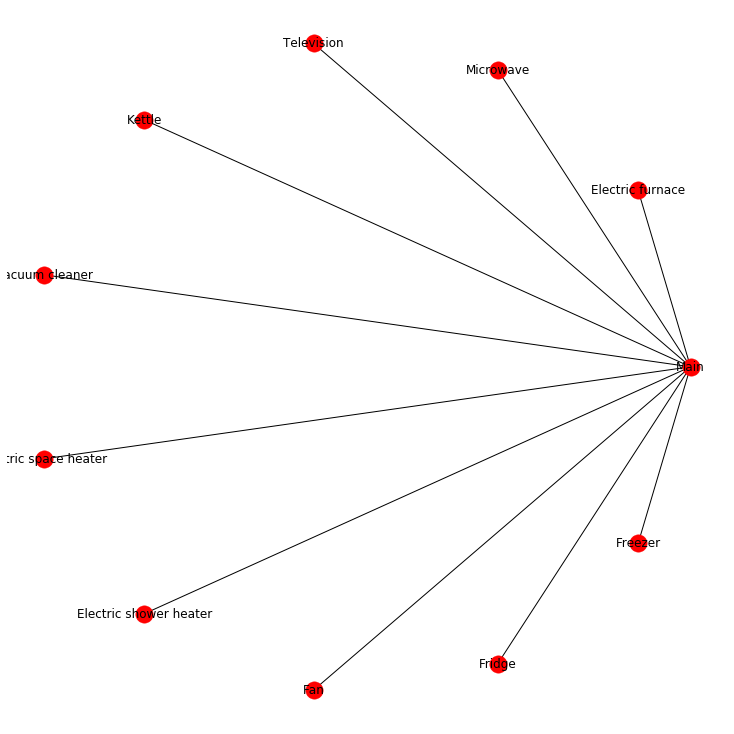

In [61]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [62]:
elec.get_timeframe()

TimeFrame(start='2022-11-23 09:42:37+01:00', end='2022-11-23 11:44:48+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 11 (es decir todos menos el principal). 

In [63]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-23 09:42:00+01:00,7.554837,5.604559,3.145058,7.994596,4.861246,7.630107,8.176503,9.262337,6.899239,-12.500296
2022-11-23 09:43:00+01:00,139.882706,1106.393188,2.370991,24.074724,13.299744,7.606400,1316.843018,38.807529,6.500289,-9.139183
2022-11-23 09:44:00+01:00,152.628510,1282.057495,2.235140,25.480160,15.032664,7.642465,1498.680054,42.032478,6.437122,-9.906272
2022-11-23 09:45:00+01:00,30.801912,192.824402,2.857745,10.467288,682.216614,7.498873,221.534164,13.801193,6.788686,-7.688576
2022-11-23 09:46:00+01:00,7.250681,5.278989,3.064910,7.726341,772.201721,7.470716,8.075168,9.050780,6.678633,-9.850160
...,...,...,...,...,...,...,...,...,...,...
2022-11-23 11:40:00+01:00,82.593002,885.980286,-45.484280,13.947653,759.180420,6.457007,415.319458,41.147934,74.261139,-4.153830
2022-11-23 11:41:00+01:00,103.403137,1257.837646,-45.525463,17.403767,770.183044,6.794241,7.238750,41.808971,72.110596,-7.347779
2022-11-23 11:42:00+01:00,98.142876,1244.870361,-45.263954,13.934137,222.184586,6.674631,7.403491,41.919559,71.082542,1.387545
2022-11-23 11:43:00+01:00,89.975273,1234.288574,-44.987724,15.786836,10.809386,6.811280,7.437215,42.115566,70.218163,-4.929552


Ahora veamos la potencia reactiva de los medidores del 2 al 6 (todos menos el principal).

In [64]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-23 09:42:00+01:00,-1.609140,-2.178170,-2.978904,-2.126848,-1.146904,-4.229957,-3.143566,-3.338242,-1.900519,-12.538783
2022-11-23 09:43:00+01:00,-39.679588,357.090271,-2.663362,-7.582127,-4.270566,-3.910896,0.169619,-2.556219,-1.843964,-7.791082
2022-11-23 09:44:00+01:00,-45.288887,356.369904,-2.632999,-7.940348,-4.280152,-3.987523,0.489160,-2.572345,-1.800371,-6.852597
2022-11-23 09:45:00+01:00,-9.280095,46.884972,-2.965994,-3.067759,45.062008,-3.877455,-2.528671,-3.190422,-1.848366,-9.333098
2022-11-23 09:46:00+01:00,-1.688563,-2.081594,-2.971325,-1.962322,49.809319,-4.086592,-3.019976,-3.290935,-1.867615,-7.113080
...,...,...,...,...,...,...,...,...,...,...
2022-11-23 11:40:00+01:00,-27.880144,276.165253,9.557875,-4.912838,43.997257,-2.569472,-1.513714,-2.671240,7.785942,-5.919390
2022-11-23 11:41:00+01:00,-35.047226,339.897491,9.242660,-6.126199,42.922066,-3.580361,-2.454037,-2.736917,7.919539,-3.880686
2022-11-23 11:42:00+01:00,-35.493946,335.821777,8.794584,-6.338023,8.306940,-1.927284,-2.449997,-2.708219,8.077969,-8.921979
2022-11-23 11:43:00+01:00,-34.060822,321.522339,8.915532,-6.146550,-3.632195,-3.416040,-2.475599,-2.748713,7.952411,-7.869693


Por ultimo, veamos la potencia aparente de los medidores del 2 al 11 (todos menos el principal).

In [65]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-23 09:42:00+01:00,7.730257,6.023747,4.346776,8.280984,5.004723,8.745358,8.764638,9.850656,7.161414,22.292055
2022-11-23 09:43:00+01:00,145.521973,1176.271973,3.672231,25.337780,14.585597,8.848810,1316.916504,38.948315,6.760989,18.107990
2022-11-23 09:44:00+01:00,159.306503,1330.754272,3.480889,26.708021,15.651441,8.644539,1498.680298,42.111874,6.688788,16.960888
2022-11-23 09:45:00+01:00,32.200890,199.421280,4.254364,10.979543,683.943848,9.268678,222.000076,14.316977,7.040811,19.593590
2022-11-23 09:46:00+01:00,7.449341,5.683506,4.279713,7.976957,773.806641,8.522509,8.625785,9.633842,6.939564,16.690388
...,...,...,...,...,...,...,...,...,...,...
2022-11-23 11:40:00+01:00,87.311455,944.149231,46.502342,15.448554,760.501648,8.802677,415.621979,41.237835,74.671371,23.025351
2022-11-23 11:41:00+01:00,109.268707,1303.092041,46.455532,18.465807,771.386841,7.895814,7.649707,41.899357,72.545586,13.611448
2022-11-23 11:42:00+01:00,104.466072,1289.489014,46.120468,15.808880,226.735474,9.027361,7.803102,42.009880,71.542542,23.892109
2022-11-23 11:43:00+01:00,96.313560,1275.601685,45.864849,16.956591,11.445709,7.840866,7.844068,42.206604,70.668991,20.124210


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [66]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2022-11-23 09:42:00+01:00 to 2022-11-23 11:44:00+01:00
Freq: 60S
Data columns (total 10 columns):
(Electric furnace,)          123 non-null float32
(Microwave,)                 123 non-null float32
(Television,)                123 non-null float32
(Kettle,)                    123 non-null float32
(Vacuum cleaner,)            123 non-null float32
(Electric space heater,)     123 non-null float32
(Electric shower heater,)    123 non-null float32
(Fan,)                       123 non-null float32
(Fridge,)                    123 non-null float32
(Freezer,)                   123 non-null float32
dtypes: float32(10)
memory usage: 5.8 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 2 (Horno) con datos capturados de 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [67]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 
df_ef

physical_quantity           voltage   current                       voltage  \
type                      armonic16 armonic44 armonic49 armonic34 armonic13   
2022-11-23 09:42:37+01:00  0.016904  0.000231  0.000917  0.000410  0.606283   
2022-11-23 09:42:38+01:00  0.016322  0.000860  0.000648  0.000634  0.633493   
2022-11-23 09:42:39+01:00  0.010953  0.000655  0.000249  0.000459  0.627322   
2022-11-23 09:42:40+01:00  0.014550  0.000399  0.000373  0.000758  0.595721   
2022-11-23 09:42:41+01:00  0.014218  0.000261  0.000527  0.000796  0.617019   
...                             ...       ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  0.015967  0.000506  0.000567  0.000578  0.328382   
2022-11-23 11:43:57+01:00  0.021701  0.000785  0.000350  0.000957  0.353679   
2022-11-23 11:43:58+01:00  0.013519  0.000823  0.000662  0.001349  0.364274   
2022-11-23 11:43:59+01:00  0.020706  0.000602  0.000654  0.000972  0.388254   
2022-11-23 11:44:00+01:00  0.016399  0.000450  0.000590  0.000613  0.401039   

physical_quantity                       power                      \
type                      armonic32  armonic2  armonic3 armonic27   
2022-11-23 09:42:37+01:00  0.011851  0.000049  0.001492  0.000013   
2022-11-23 09:42:38+01:00  0.007552  0.000097  0.003666  0.000001   
2022-11-23 09:42:39+01:00  0.006877  0.000071  0.003193  0.000014   
2022-11-23 09:42:40+01:00  0.009814 -0.000180  0.003278  0.000010   
2022-11-23 09:42:41+01:00  0.009660  0.000082  0.003157  0.000010   
...                             ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  0.009937  0.022077 -0.015792 -0.000011   
2022-11-23 11:43:57+01:00  0.007972  0.041441 -0.091921 -0.000045   
2022-11-23 11:43:58+01:00  0.007075  0.068282 -0.083637 -0.000025   
2022-11-23 11:43:59+01:00  0.007397  0.064559 -0.030528  0.000029   
2022-11-23 11:44:00+01:00  0.005742  0.031614 -0.055847 -0.000012   

physical_quantity                        ...   current   voltage     power  \
type                          armonic46  ... armonic29 armonic19 armonic43   
2022-11-23 09:42:37+01:00  4.500000e-06  ...  0.000388  0.219391  0.000012   
2022-11-23 09:42:38+01:00  1.200000e-06  ...  0.000420  0.201391 -0.000006   
2022-11-23 09:42:39+01:00 -8.000000e-07  ...  0.000432  0.196603 -0.000005   
2022-11-23 09:42:40+01:00 -4.547474e-14  ...  0.000600  0.211538 -0.000004   
2022-11-23 09:42:41+01:00  2.000000e-07  ...  0.000840  0.202373 -0.000021   
...                                 ...  ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  1.800000e-06  ...  0.000673  0.160156 -0.000012   
2022-11-23 11:43:57+01:00  0.000000e+00  ...  0.000944  0.144884 -0.000007   
2022-11-23 11:43:58+01:00  1.400000e-06  ...  0.001694  0.138171  0.000004   
2022-11-23 11:43:59+01:00  1.800000e-06  ...  0.001799  0.152406 -0.000006   
2022-11-23 11:44:00+01:00 -2.000000e-07  ...  0.000599  0.146302 -0.000007   

physical_quantity                     current         power                \
type                      armonic13 armonic23     armonic23     armonic35   
2022-11-23 09:42:37+01:00 -0.000304  0.000437 -6.750000e-05  1.350000e-05   
2022-11-23 09:42:38+01:00 -0.000277  0.000560 -2.400000e-05  7.200000e-06   
2022-11-23 09:42:39+01:00 -0.000355  0.000436 -4.860000e-05  4.800000e-06   
2022-11-23 09:42:40+01:00 -0.000288  0.000523 -8.800000e-06  9.999999e-07   
2022-11-23 09:42:41+01:00 -0.000087  0.000546 -3.340000e-05  9.600000e-06   
...                             ...       ...           ...           ...   
2022-11-23 11:43:56+01:00  0.000260  0.000774 -4.900000e-05  1.800000e-06   
2022-11-23 11:43:57+01:00  0.000049  0.000871 -8.000004e-07  4.800000e-06   
2022-11-23 11:43:58+01:00  0.002726  0.002488 -1.350000e-04  5.600001e-06   
2022-11-23 11:43:59+01:00  0.001794  0.001829 -5.380000e-05  1.400000e-06   
2022-11-23 11:44:00+01:00  0.000201  0.001048 -3.080000e-05 -5.999999e-07   

physical_quantity           current                      

Se puede visualizar solo la cabecera de los datos

In [68]:
df_ef.head()

physical_quantity           voltage   current                       voltage  \
type                      armonic16 armonic44 armonic49 armonic34 armonic13   
2022-11-23 09:42:37+01:00  0.016904  0.000231  0.000917  0.000410  0.606283   
2022-11-23 09:42:38+01:00  0.016322  0.000860  0.000648  0.000634  0.633493   
2022-11-23 09:42:39+01:00  0.010953  0.000655  0.000249  0.000459  0.627322   
2022-11-23 09:42:40+01:00  0.014550  0.000399  0.000373  0.000758  0.595721   
2022-11-23 09:42:41+01:00  0.014218  0.000261  0.000527  0.000796  0.617019   

physical_quantity                       power                      \
type                      armonic32  armonic2  armonic3 armonic27   
2022-11-23 09:42:37+01:00  0.011851  0.000049  0.001492  0.000013   
2022-11-23 09:42:38+01:00  0.007552  0.000097  0.003666  0.000001   
2022-11-23 09:42:39+01:00  0.006877  0.000071  0.003193  0.000014   
2022-11-23 09:42:40+01:00  0.009814 -0.000180  0.003278  0.000010   
2022-11-23 09:42:41+01:00  0.009660  0.000082  0.003157  0.000010   

physical_quantity                        ...   current   voltage     power  \
type                          armonic46  ... armonic29 armonic19 armonic43   
2022-11-23 09:42:37+01:00  4.500000e-06  ...  0.000388  0.219391  0.000012   
2022-11-23 09:42:38+01:00  1.200000e-06  ...  0.000420  0.201391 -0.000006   
2022-11-23 09:42:39+01:00 -8.000000e-07  ...  0.000432  0.196603 -0.000005   
2022-11-23 09:42:40+01:00 -4.547474e-14  ...  0.000600  0.211538 -0.000004   
2022-11-23 09:42:41+01:00  2.000000e-07  ...  0.000840  0.202373 -0.000021   

physical_quantity                     current     power                \
type                      armonic13 armonic23 armonic23     armonic35   
2022-11-23 09:42:37+01:00 -0.000304  0.000437 -0.000068  1.350000e-05   
2022-11-23 09:42:38+01:00 -0.000277  0.000560 -0.000024  7.200000e-06   
2022-11-23 09:42:39+01:00 -0.000355  0.000436 -0.000049  4.800000e-06   
2022-11-23 09:42:40+01:00 -0.000288  0.000523 -0.000009  9.999999e-07   
2022-11-23 09:42:41+01:00 -0.000087  0.000546 -0.000033  9.600000e-06   

physical_quantity           current                      
type                      armonic43 armonic18 armonic17  
2022-11-23 09:42:37+01:00  0.000541  0.000598  0.001267  
2022-11-23 09:42:38+01:00  0.000578  0.000712  0.000698  
2022-11-23 09:42:39+01:00  0.000345  0.000653  0.000759  
2022-11-23 09:42:40+01:00  0.000677  0.000823  0.000728  
2022-11-23 09:42:41+01:00  0.000605  0.000684  0.000592  

[5 rows x 156 columns]

Vemos para el meter nº 4(Freezer) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [69]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_freezer = next(elec[4].load())[t0:t1] #DataFrame medidor 
df_freezer

physical_quantity           voltage   current                       voltage  \
type                      armonic16 armonic44 armonic49 armonic34 armonic13   
2022-11-23 09:42:37+01:00  0.013064  0.000729  0.000784  0.000465  0.602142   
2022-11-23 09:42:38+01:00  0.015717  0.000463  0.000869  0.000808  0.635744   
2022-11-23 09:42:39+01:00  0.013427  0.000701  0.000758  0.000709  0.619833   
2022-11-23 09:42:40+01:00  0.011724  0.000811  0.000609  0.000666  0.591433   
2022-11-23 09:42:41+01:00  0.005347  0.000410  0.000718  0.000480  0.606825   
...                             ...       ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  0.014169  0.000891  0.002449  0.001305  0.323935   
2022-11-23 11:43:57+01:00  0.015896  0.000788  0.002353  0.001151  0.354894   
2022-11-23 11:43:58+01:00  0.015131  0.000623  0.001971  0.001104  0.362134   
2022-11-23 11:43:59+01:00  0.022912  0.001057  0.002598  0.001770  0.384617   
2022-11-23 11:44:00+01:00  0.022477  0.000897  0.002560  0.001372  0.401565   

physical_quantity                           power                          \
type                      armonic32      armonic2  armonic3     armonic27   
2022-11-23 09:42:37+01:00  0.006869 -7.000000e-06 -0.000026  1.000000e-06   
2022-11-23 09:42:38+01:00  0.006697  1.136868e-13 -0.000482 -1.080000e-05   
2022-11-23 09:42:39+01:00  0.009244  4.020000e-05 -0.000493 -1.820000e-05   
2022-11-23 09:42:40+01:00  0.012552  1.780000e-05 -0.000189 -3.600000e-06   
2022-11-23 09:42:41+01:00  0.009773  7.400000e-06 -0.000327 -3.999998e-07   
...                             ...           ...       ...           ...   
2022-11-23 11:43:56+01:00  0.009472 -4.384000e-04 -0.073377 -1.130000e-04   
2022-11-23 11:43:57+01:00  0.010587 -4.600000e-04 -0.074204 -3.030000e-04   
2022-11-23 11:43:58+01:00  0.010363 -8.394000e-04 -0.075943 -3.328000e-04   
2022-11-23 11:43:59+01:00  0.004150 -6.956000e-04 -0.072950 -3.288000e-04   
2022-11-23 11:44:00+01:00  0.010264 -4.274000e-04 -0.069053 -4.148000e-04   

physical_quantity                        ...   current   voltage     power  \
type                          armonic46  ... armonic29 armonic19 armonic43   
2022-11-23 09:42:37+01:00  6.666667e-07  ...  0.000811  0.211632 -0.000014   
2022-11-23 09:42:38+01:00  2.000000e-07  ...  0.001006  0.201425  0.000030   
2022-11-23 09:42:39+01:00  7.400000e-06  ...  0.000647  0.199862  0.000018   
2022-11-23 09:42:40+01:00 -1.600000e-06  ...  0.000774  0.205937  0.000017   
2022-11-23 09:42:41+01:00  8.800000e-06  ...  0.000475  0.207300 -0.000005   
...                                 ...  ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  3.400000e-06  ...  0.012347  0.156146 -0.000133   
2022-11-23 11:43:57+01:00  8.800000e-06  ...  0.011722  0.146933 -0.000124   
2022-11-23 11:43:58+01:00  1.200000e-06  ...  0.011759  0.146809 -0.000113   
2022-11-23 11:43:59+01:00  8.000000e-07  ...  0.010681  0.142910 -0.000118   
2022-11-23 11:44:00+01:00 -3.200000e-06  ...  0.010008  0.143409 -0.000154   

physical_quantity                     current     power                \
type                      armonic13 armonic23 armonic23     armonic35   
2022-11-23 09:42:37+01:00  0.000209  0.001011  0.000040  2.000000e-06   
2022-11-23 09:42:38+01:00  0.000643  0.000920  0.000152 -5.200000e-06   
2022-11-23 09:42:39+01:00  0.000457  0.000788  0.000084 -6.000000e-06   
2022-11-23 09:42:40+01:00  0.000296  0.000937  0.000040 -1.200000e-06   
2022-11-23 09:42:41+01:00  0.000503  0.000624  0.000059  1.591616e-13   
...                             ...       ...       ...           ...   
2022-11-23 11:43:56+01:00  0.016888  0.020106  0.000281  1.320000e-05   
2022-11-23 11:43:57+01:00  0.018253  0.019161  0.000407  2.599999e-06   
2022-11-23 11:43:58+01:00  0.018509  0.019665  0.000426  4.440000e-05   
2022-11-23 11:43:59+01:00  0.019449  0.019285  0.000688  4.060000e-05   
2022-11-23 11:44:00+01:00  0.019965  0.018929  0.000740  2.880000e-05   

physi

Vemos para el meter nº 2(boiler) con datos capturados de 17:00 a 17:05 tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [70]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final



df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           voltage   current                       voltage  \
type                      armonic16 armonic44 armonic49 armonic34 armonic13   
2022-11-23 09:42:37+01:00  0.016904  0.000231  0.000917  0.000410  0.606283   
2022-11-23 09:42:38+01:00  0.016322  0.000860  0.000648  0.000634  0.633493   
2022-11-23 09:42:39+01:00  0.010953  0.000655  0.000249  0.000459  0.627322   
2022-11-23 09:42:40+01:00  0.014550  0.000399  0.000373  0.000758  0.595721   
2022-11-23 09:42:41+01:00  0.014218  0.000261  0.000527  0.000796  0.617019   
...                             ...       ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  0.015967  0.000506  0.000567  0.000578  0.328382   
2022-11-23 11:43:57+01:00  0.021701  0.000785  0.000350  0.000957  0.353679   
2022-11-23 11:43:58+01:00  0.013519  0.000823  0.000662  0.001349  0.364274   
2022-11-23 11:43:59+01:00  0.020706  0.000602  0.000654  0.000972  0.388254   
2022-11-23 11:44:00+01:00  0.016399  0.000450  0.000590  0.000613  0.401039   

physical_quantity                       power                      \
type                      armonic32  armonic2  armonic3 armonic27   
2022-11-23 09:42:37+01:00  0.011851  0.000049  0.001492  0.000013   
2022-11-23 09:42:38+01:00  0.007552  0.000097  0.003666  0.000001   
2022-11-23 09:42:39+01:00  0.006877  0.000071  0.003193  0.000014   
2022-11-23 09:42:40+01:00  0.009814 -0.000180  0.003278  0.000010   
2022-11-23 09:42:41+01:00  0.009660  0.000082  0.003157  0.000010   
...                             ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  0.009937  0.022077 -0.015792 -0.000011   
2022-11-23 11:43:57+01:00  0.007972  0.041441 -0.091921 -0.000045   
2022-11-23 11:43:58+01:00  0.007075  0.068282 -0.083637 -0.000025   
2022-11-23 11:43:59+01:00  0.007397  0.064559 -0.030528  0.000029   
2022-11-23 11:44:00+01:00  0.005742  0.031614 -0.055847 -0.000012   

physical_quantity                        ...   current   voltage     power  \
type                          armonic46  ... armonic29 armonic19 armonic43   
2022-11-23 09:42:37+01:00  4.500000e-06  ...  0.000388  0.219391  0.000012   
2022-11-23 09:42:38+01:00  1.200000e-06  ...  0.000420  0.201391 -0.000006   
2022-11-23 09:42:39+01:00 -8.000000e-07  ...  0.000432  0.196603 -0.000005   
2022-11-23 09:42:40+01:00 -4.547474e-14  ...  0.000600  0.211538 -0.000004   
2022-11-23 09:42:41+01:00  2.000000e-07  ...  0.000840  0.202373 -0.000021   
...                                 ...  ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  1.800000e-06  ...  0.000673  0.160156 -0.000012   
2022-11-23 11:43:57+01:00  0.000000e+00  ...  0.000944  0.144884 -0.000007   
2022-11-23 11:43:58+01:00  1.400000e-06  ...  0.001694  0.138171  0.000004   
2022-11-23 11:43:59+01:00  1.800000e-06  ...  0.001799  0.152406 -0.000006   
2022-11-23 11:44:00+01:00 -2.000000e-07  ...  0.000599  0.146302 -0.000007   

physical_quantity                     current         power                \
type                      armonic13 armonic23     armonic23     armonic35   
2022-11-23 09:42:37+01:00 -0.000304  0.000437 -6.750000e-05  1.350000e-05   
2022-11-23 09:42:38+01:00 -0.000277  0.000560 -2.400000e-05  7.200000e-06   
2022-11-23 09:42:39+01:00 -0.000355  0.000436 -4.860000e-05  4.800000e-06   
2022-11-23 09:42:40+01:00 -0.000288  0.000523 -8.800000e-06  9.999999e-07   
2022-11-23 09:42:41+01:00 -0.000087  0.000546 -3.340000e-05  9.600000e-06   
...                             ...       ...           ...           ...   
2022-11-23 11:43:56+01:00  0.000260  0.000774 -4.900000e-05  1.800000e-06   
2022-11-23 11:43:57+01:00  0.000049  0.000871 -8.000004e-07  4.800000e-06   
2022-11-23 11:43:58+01:00  0.002726  0.002488 -1.350000e-04  5.600001e-06   
2022-11-23 11:43:59+01:00  0.001794  0.001829 -5.380000e-05  1.400000e-06   
2022-11-23 11:44:00+01:00  0.000201  0.001048 -3.080000e-05 -5.999999e-07   

physical_quantity           current                      

Veamos para el meter nº 6(boiler) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [71]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final



df_boiler = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           voltage   current                       voltage  \
type                      armonic16 armonic44 armonic49 armonic34 armonic13   
2022-11-23 09:42:37+01:00  0.016904  0.000281  0.000476  0.000352  0.606283   
2022-11-23 09:42:38+01:00  0.016322  0.000872  0.000482  0.000897  0.633493   
2022-11-23 09:42:39+01:00  0.010953  0.000465  0.000394  0.000409  0.627322   
2022-11-23 09:42:40+01:00  0.014550  0.000812  0.000473  0.000732  0.595721   
2022-11-23 09:42:41+01:00  0.014218  0.000454  0.000494  0.000755  0.617019   
...                             ...       ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  0.015967  0.000367  0.000491  0.000221  0.328382   
2022-11-23 11:43:57+01:00  0.021701  0.000473  0.000331  0.000429  0.353679   
2022-11-23 11:43:58+01:00  0.013519  0.000695  0.000368  0.000671  0.364274   
2022-11-23 11:43:59+01:00  0.020706  0.000587  0.000361  0.000425  0.388254   
2022-11-23 11:44:00+01:00  0.016399  0.000602  0.000616  0.000402  0.401039   

physical_quantity                       power                      \
type                      armonic32  armonic2  armonic3 armonic27   
2022-11-23 09:42:37+01:00  0.011851  0.000022  0.000653  0.000016   
2022-11-23 09:42:38+01:00  0.007552  0.000055  0.002562  0.000013   
2022-11-23 09:42:39+01:00  0.006877  0.000019  0.001864  0.000013   
2022-11-23 09:42:40+01:00  0.009814 -0.000081  0.000315  0.000011   
2022-11-23 09:42:41+01:00  0.009660 -0.000010  0.001599  0.000014   
...                             ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  0.009937  0.000556  0.002911 -0.000003   
2022-11-23 11:43:57+01:00  0.007972  0.002655  0.000976 -0.000007   
2022-11-23 11:43:58+01:00  0.007075  0.005203 -0.003496  0.000009   
2022-11-23 11:43:59+01:00  0.007397  0.003301  0.004745  0.000001   
2022-11-23 11:44:00+01:00  0.005742  0.000654  0.000648 -0.000039   

physical_quantity                        ...   current   voltage  \
type                          armonic46  ... armonic29 armonic19   
2022-11-23 09:42:37+01:00  5.500000e-06  ...  0.000595  0.219391   
2022-11-23 09:42:38+01:00  2.200000e-06  ...  0.000444  0.201391   
2022-11-23 09:42:39+01:00  0.000000e+00  ...  0.000426  0.196603   
2022-11-23 09:42:40+01:00 -2.000000e-07  ...  0.000828  0.211538   
2022-11-23 09:42:41+01:00  0.000000e+00  ...  0.000787  0.202373   
...                                 ...  ...       ...       ...   
2022-11-23 11:43:56+01:00  2.600000e-06  ...  0.000490  0.160156   
2022-11-23 11:43:57+01:00  1.200000e-06  ...  0.001244  0.144884   
2022-11-23 11:43:58+01:00  1.000000e-06  ...  0.000450  0.138171   
2022-11-23 11:43:59+01:00  2.000000e-07  ...  0.000478  0.152406   
2022-11-23 11:44:00+01:00  1.000000e-06  ...  0.000802  0.146302   

physical_quantity                 power             current     power  \
type                          armonic43 armonic13 armonic23 armonic23   
2022-11-23 09:42:37+01:00 -1.000000e-06 -0.000309  0.000687 -0.000057   
2022-11-23 09:42:38+01:00 -1.900000e-05 -0.000466  0.000620 -0.000047   
2022-11-23 09:42:39+01:00 -6.600000e-06 -0.000391  0.000260 -0.000020   
2022-11-23 09:42:40+01:00 -1.220000e-05 -0.000312  0.000472 -0.000017   
2022-11-23 09:42:41+01:00 -2.060000e-05 -0.000076  0.000646 -0.000027   
...                                 ...       ...       ...       ...   
2022-11-23 11:43:56+01:00 -1.400000e-06  0.000119  0.000476  0.000021   
2022-11-23 11:43:57+01:00 -7.400000e-06  0.000314  0.001670 -0.000075   
2022-11-23 11:43:58+01:00 -2.273737e-14  0.000329  0.000496 -0.000013   
2022-11-23 11:43:59+01:00 -1.600000e-06  0.000202  0.000599  0.000006   
2022-11-23 11:44:00+01:00 -1.800000e-06  0.000015  0.000673 -0.000022   

physical_quantity                         current                      
type                          armonic35 armonic43 armonic18 armonic17  
2022-11-23 09:42:37+01:00  1.700000e-05  0.000653  0.000635  0.000955  
2022-11-23 09:42:38+01:

Veamos para el meter nº 2(Fan) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [72]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final



df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           voltage   current                       voltage  \
type                      armonic16 armonic44 armonic49 armonic34 armonic13   
2022-11-23 09:42:37+01:00  0.016904  0.000231  0.000917  0.000410  0.606283   
2022-11-23 09:42:38+01:00  0.016322  0.000860  0.000648  0.000634  0.633493   
2022-11-23 09:42:39+01:00  0.010953  0.000655  0.000249  0.000459  0.627322   
2022-11-23 09:42:40+01:00  0.014550  0.000399  0.000373  0.000758  0.595721   
2022-11-23 09:42:41+01:00  0.014218  0.000261  0.000527  0.000796  0.617019   
...                             ...       ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  0.015967  0.000506  0.000567  0.000578  0.328382   
2022-11-23 11:43:57+01:00  0.021701  0.000785  0.000350  0.000957  0.353679   
2022-11-23 11:43:58+01:00  0.013519  0.000823  0.000662  0.001349  0.364274   
2022-11-23 11:43:59+01:00  0.020706  0.000602  0.000654  0.000972  0.388254   
2022-11-23 11:44:00+01:00  0.016399  0.000450  0.000590  0.000613  0.401039   

physical_quantity                       power                      \
type                      armonic32  armonic2  armonic3 armonic27   
2022-11-23 09:42:37+01:00  0.011851  0.000049  0.001492  0.000013   
2022-11-23 09:42:38+01:00  0.007552  0.000097  0.003666  0.000001   
2022-11-23 09:42:39+01:00  0.006877  0.000071  0.003193  0.000014   
2022-11-23 09:42:40+01:00  0.009814 -0.000180  0.003278  0.000010   
2022-11-23 09:42:41+01:00  0.009660  0.000082  0.003157  0.000010   
...                             ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  0.009937  0.022077 -0.015792 -0.000011   
2022-11-23 11:43:57+01:00  0.007972  0.041441 -0.091921 -0.000045   
2022-11-23 11:43:58+01:00  0.007075  0.068282 -0.083637 -0.000025   
2022-11-23 11:43:59+01:00  0.007397  0.064559 -0.030528  0.000029   
2022-11-23 11:44:00+01:00  0.005742  0.031614 -0.055847 -0.000012   

physical_quantity                        ...   current   voltage     power  \
type                          armonic46  ... armonic29 armonic19 armonic43   
2022-11-23 09:42:37+01:00  4.500000e-06  ...  0.000388  0.219391  0.000012   
2022-11-23 09:42:38+01:00  1.200000e-06  ...  0.000420  0.201391 -0.000006   
2022-11-23 09:42:39+01:00 -8.000000e-07  ...  0.000432  0.196603 -0.000005   
2022-11-23 09:42:40+01:00 -4.547474e-14  ...  0.000600  0.211538 -0.000004   
2022-11-23 09:42:41+01:00  2.000000e-07  ...  0.000840  0.202373 -0.000021   
...                                 ...  ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  1.800000e-06  ...  0.000673  0.160156 -0.000012   
2022-11-23 11:43:57+01:00  0.000000e+00  ...  0.000944  0.144884 -0.000007   
2022-11-23 11:43:58+01:00  1.400000e-06  ...  0.001694  0.138171  0.000004   
2022-11-23 11:43:59+01:00  1.800000e-06  ...  0.001799  0.152406 -0.000006   
2022-11-23 11:44:00+01:00 -2.000000e-07  ...  0.000599  0.146302 -0.000007   

physical_quantity                     current         power                \
type                      armonic13 armonic23     armonic23     armonic35   
2022-11-23 09:42:37+01:00 -0.000304  0.000437 -6.750000e-05  1.350000e-05   
2022-11-23 09:42:38+01:00 -0.000277  0.000560 -2.400000e-05  7.200000e-06   
2022-11-23 09:42:39+01:00 -0.000355  0.000436 -4.860000e-05  4.800000e-06   
2022-11-23 09:42:40+01:00 -0.000288  0.000523 -8.800000e-06  9.999999e-07   
2022-11-23 09:42:41+01:00 -0.000087  0.000546 -3.340000e-05  9.600000e-06   
...                             ...       ...           ...           ...   
2022-11-23 11:43:56+01:00  0.000260  0.000774 -4.900000e-05  1.800000e-06   
2022-11-23 11:43:57+01:00  0.000049  0.000871 -8.000004e-07  4.800000e-06   
2022-11-23 11:43:58+01:00  0.002726  0.002488 -1.350000e-04  5.600001e-06   
2022-11-23 11:43:59+01:00  0.001794  0.001829 -5.380000e-05  1.400000e-06   
2022-11-23 11:44:00+01:00  0.000201  0.001048 -3.080000e-05 -5.999999e-07   

physical_quantity           current                      

Veamos para el ultimo meter nº 4(TV) con datos capturados el dia 2 de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [73]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final



df_boiler = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           voltage   current                       voltage  \
type                      armonic16 armonic44 armonic49 armonic34 armonic13   
2022-11-23 09:42:37+01:00  0.016904  0.000293  0.000779  0.000525  0.606283   
2022-11-23 09:42:38+01:00  0.016322  0.000969  0.000510  0.000733  0.633493   
2022-11-23 09:42:39+01:00  0.010953  0.000510  0.000367  0.000414  0.627322   
2022-11-23 09:42:40+01:00  0.014550  0.001525  0.000745  0.001572  0.595721   
2022-11-23 09:42:41+01:00  0.014218  0.000380  0.000696  0.000761  0.617019   
...                             ...       ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  0.015967  0.000623  0.000397  0.000494  0.328382   
2022-11-23 11:43:57+01:00  0.021701  0.000580  0.000285  0.000320  0.353679   
2022-11-23 11:43:58+01:00  0.013519  0.000617  0.000617  0.000437  0.364274   
2022-11-23 11:43:59+01:00  0.020706  0.000561  0.000426  0.000405  0.388254   
2022-11-23 11:44:00+01:00  0.016399  0.000492  0.000671  0.000670  0.401039   

physical_quantity                       power                      \
type                      armonic32  armonic2  armonic3 armonic27   
2022-11-23 09:42:37+01:00  0.011851  0.000038  0.001648  0.000011   
2022-11-23 09:42:38+01:00  0.007552  0.000146  0.002102  0.000010   
2022-11-23 09:42:39+01:00  0.006877  0.000069  0.001410  0.000012   
2022-11-23 09:42:40+01:00  0.009814 -0.000281  0.001509  0.000034   
2022-11-23 09:42:41+01:00  0.009660  0.000135  0.002364  0.000020   
...                             ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  0.009937  0.001072  0.002541 -0.000001   
2022-11-23 11:43:57+01:00  0.007972  0.004406 -0.002853 -0.000012   
2022-11-23 11:43:58+01:00  0.007075  0.007772 -0.008821  0.000014   
2022-11-23 11:43:59+01:00  0.007397  0.005865 -0.003418  0.000010   
2022-11-23 11:44:00+01:00  0.005742  0.003022 -0.001439 -0.000025   

physical_quantity                        ...   current   voltage     power  \
type                          armonic46  ... armonic29 armonic19 armonic43   
2022-11-23 09:42:37+01:00  5.000000e-06  ...  0.000556  0.219391 -0.000004   
2022-11-23 09:42:38+01:00  2.400000e-06  ...  0.000562  0.201391 -0.000004   
2022-11-23 09:42:39+01:00 -1.400000e-06  ...  0.000430  0.196603 -0.000007   
2022-11-23 09:42:40+01:00 -3.000000e-06  ...  0.002313  0.211538  0.000005   
2022-11-23 09:42:41+01:00  6.000000e-07  ...  0.000759  0.202373 -0.000007   
...                                 ...  ...       ...       ...       ...   
2022-11-23 11:43:56+01:00  1.000000e-06  ...  0.000765  0.160156 -0.000008   
2022-11-23 11:43:57+01:00  8.000000e-07  ...  0.001206  0.144884 -0.000008   
2022-11-23 11:43:58+01:00  1.000000e-06  ...  0.000821  0.138171 -0.000003   
2022-11-23 11:43:59+01:00  2.400000e-06  ...  0.000421  0.152406 -0.000006   
2022-11-23 11:44:00+01:00 -2.000000e-07  ...  0.000603  0.146302 -0.000008   

physical_quantity                     current         power            \
type                      armonic13 armonic23     armonic23 armonic35   
2022-11-23 09:42:37+01:00 -0.000242  0.000413 -2.900000e-05  0.000020   
2022-11-23 09:42:38+01:00 -0.000180  0.000930 -1.246000e-04  0.000012   
2022-11-23 09:42:39+01:00 -0.000267  0.000371 -3.680000e-05  0.000005   
2022-11-23 09:42:40+01:00 -0.000260  0.001884  4.740000e-05 -0.000019   
2022-11-23 09:42:41+01:00 -0.000117  0.000654 -1.320000e-05  0.000007   
...                             ...       ...           ...       ...   
2022-11-23 11:43:56+01:00 -0.000062  0.000656  4.200000e-06  0.000007   
2022-11-23 11:43:57+01:00 -0.000030  0.001303 -4.400000e-05  0.000007   
2022-11-23 11:43:58+01:00  0.000433  0.000844 -1.999996e-07  0.000014   
2022-11-23 11:43:59+01:00  0.000235  0.000521 -6.199999e-06  0.000013   
2022-11-23 11:44:00+01:00 -0.000149  0.000708 -1.740000e-05 -0.000005   

physical_quantity           current                      
type                      armonic43 armonic18 armon

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [74]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0603556414686468

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [75]:
series = next(fan.power_series())
series.head()

2022-11-23 09:42:37+01:00    9.332075
2022-11-23 09:42:38+01:00    9.187424
2022-11-23 09:42:39+01:00    9.140324
2022-11-23 09:42:40+01:00    9.303112
2022-11-23 09:42:41+01:00    9.124446
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [76]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2022-11-23 09:42:37+01:00   -3.104715
2022-11-23 09:42:38+01:00   -3.286294
2022-11-23 09:42:39+01:00   -3.188080
2022-11-23 09:42:40+01:00   -3.323186
2022-11-23 09:42:41+01:00   -3.534008
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [77]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2022-11-23 09:42:37+01:00,-3.104715
2022-11-23 09:42:38+01:00,-3.286294
2022-11-23 09:42:39+01:00,-3.188080
2022-11-23 09:42:40+01:00,-3.323186
2022-11-23 09:42:41+01:00,-3.534008


Para cargar datos de voltaje:

In [78]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity           voltage                                          \
type                      armonic16 armonic13 armonic32 armonic25 armonic36   
2022-11-23 09:42:37+01:00  0.018028  0.602331  0.005318  0.006963  0.011181   
2022-11-23 09:42:38+01:00  0.017717  0.634331  0.006734  0.014571  0.008986   
2022-11-23 09:42:39+01:00  0.040967  0.577800  0.014140  0.019752  0.013512   
2022-11-23 09:42:40+01:00  0.022622  0.585663  0.015878  0.016385  0.009735   
2022-11-23 09:42:41+01:00  0.014175  0.616475  0.008652  0.022927  0.012357   

physical_quantity                                                            \
type                      armonic49  armonic2 armonic27 armonic46 armonic42   
2022-11-23 09:42:37+01:00  0.016997  0.028251  0.036441  0.006112  0.005979   
2022-11-23 09:42:38+01:00  0.013357  0.061707  0.033547  0.007667  0.006481   
2022-11-23 09:42:39+01:00  0.024997  0.383932  0.036137  0.016323  0.011229   
2022-11-23 09:42:40+01:00  0.017291  0.232836  0.039108  0.010728  0.007389   
2022-11-23 09:42:41+01:00  0.013769  0.042803  0.037008  0.006788  0.007342   

physical_quantity          ...                                          \
type                       ...  armonic5 armonic35 armonic22 armonic29   
2022-11-23 09:42:37+01:00  ...  3.584230  0.021951  0.013454  0.023207   
2022-11-23 09:42:38+01:00  ...  3.608310  0.019902  0.010031  0.028657   
2022-11-23 09:42:39+01:00  ...  3.466836  0.021812  0.037201  0.029923   
2022-11-23 09:42:40+01:00  ...  3.519327  0.020714  0.025692  0.027544   
2022-11-23 09:42:41+01:00  ...  3.511238  0.020053  0.009372  0.026676   

physical_quantity                                                              \
type                       armonic6 armonic23 armonic50    armonic1 armonic15   
2022-11-23 09:42:37+01:00  0.047347  0.170427  0.005675  243.813263  0.144321   
2022-11-23 09:42:38+01:00  0.054240  0.177405  0.003340  243.764969  0.151214   
2022-11-23 09:42:39+01:00  0.114741  0.138191  0.010913  243.428253  0.159478   
2022-11-23 09:42:40+01:00  0.074096  0.157801  0.010753  243.635788  0.147474   
2022-11-23 09:42:41+01:00  0.053409  0.184041  0.006042  243.680389  0.164589   

physical_quantity                    
type                      armonic19  
2022-11-23 09:42:37+01:00  0.212243  
2022-11-23 09:42:38+01:00  0.202198  
2022-11-23 09:42:39+01:00  0.178751  
2022-11-23 09:42:40+01:00  0.199700  
2022-11-23 09:42:41+01:00  0.203891  

[5 rows x 50 columns]

In [79]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                                    \
type                       armonic2  armonic3 armonic27     armonic46   
2022-11-23 09:42:37+01:00  0.000123  0.003439  0.000009  3.000000e-06   
2022-11-23 09:42:38+01:00  0.000058  0.003751  0.000008  6.000000e-07   
2022-11-23 09:42:39+01:00  0.000501  0.004702  0.000006  7.600000e-06   
2022-11-23 09:42:40+01:00  0.000173  0.003797  0.000020  1.200000e-06   
2022-11-23 09:42:41+01:00  0.000078  0.003402 -0.000005  6.000000e-07   

physical_quantity                                                          \
type                          armonic48 armonic11     armonic39 armonic19   
2022-11-23 09:42:37+01:00  1.000000e-06  0.000065  4.000000e-06  0.000131   
2022-11-23 09:42:38+01:00  1.000000e-06  0.000126 -1.999999e-07 -0.000014   
2022-11-23 09:42:39+01:00  4.000000e-07  0.000161  1.800000e-06  0.000099   
2022-11-23 09:42:40+01:00 -2.000000e-06  0.000238  6.000000e-06  0.000116   
2022-11-23 09:42:41+01:00  1.800000e-06  0.000056  4.400000e-06  0.000055   

physical_quantity                                  ...                \
type                          armonic38  armonic6  ...     armonic28   
2022-11-23 09:42:37+01:00  3.000000e-06  0.000031  ... -2.500000e-06   
2022-11-23 09:42:38+01:00  4.000000e-07  0.000059  ...  2.400000e-06   
2022-11-23 09:42:39+01:00  4.800000e-06  0.000077  ... -3.000000e-06   
2022-11-23 09:42:40+01:00  6.200000e-06  0.000059  ... -2.000000e-07   
2022-11-23 09:42:41+01:00  2.000000e-07  0.000057  ... -2.000000e-06   

physical_quantity                                                              \
type                          armonic44 armonic17     armonic22     armonic16   
2022-11-23 09:42:37+01:00  1.500000e-06  0.000042 -1.500000e-06  5.000002e-07   
2022-11-23 09:42:38+01:00  3.800000e-06  0.000018 -1.400000e-06 -1.320000e-05   
2022-11-23 09:42:39+01:00 -4.000000e-07  0.000043 -8.800000e-06 -1.600000e-06   
2022-11-23 09:42:40+01:00  2.200000e-06  0.000069 -6.200000e-06  1.200000e-05   
2022-11-23 09:42:41+01:00  2.400000e-06  0.000040 -6.000000e-07 -1.600000e-06   

physical_quantity                                                      \
type                      armonic18     armonic43 armonic13 armonic23   
2022-11-23 09:42:37+01:00  0.000006 -3.500000e-06 -0.000429 -0.000049   
2022-11-23 09:42:38+01:00  0.000006 -2.400000e-06 -0.000179 -0.000078   
2022-11-23 09:42:39+01:00  0.000006  4.600000e-06 -0.000110 -0.000024   
2022-11-23 09:42:40+01:00  0.000003  8.000001e-07 -0.000158 -0.000024   
2022-11-23 09:42:41+01:00  0.000006  1.599999e-06 -0.000141 -0.000095   

physical_quantity                    
type                      armonic35  
2022-11-23 09:42:37+01:00  0.000009  
2022-11-23 09:42:38+01:00  0.000008  
2022-11-23 09:42:39+01:00  0.000005  
2022-11-23 09:42:40+01:00  0.000003  
2022-11-23 09:42:41+01:00  0.000007  

[5 rows x 53 columns]

### Cargando especificando el tipo de CA

In [80]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2022-11-23 09:42:37+01:00,9.332075
2022-11-23 09:42:38+01:00,9.187424
2022-11-23 09:42:39+01:00,9.140324
2022-11-23 09:42:40+01:00,9.303112
2022-11-23 09:42:41+01:00,9.124446


### Cargando por remuestreo a un período específico

In [81]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2022-11-23 09:42:00+01:00,9.262337
2022-11-23 09:43:00+01:00,38.807529
2022-11-23 09:44:00+01:00,42.032478
2022-11-23 09:45:00+01:00,13.801193
2022-11-23 09:46:00+01:00,9.050780


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 de REDD:

In [82]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0603556414686468

## Potencia activa, aparente y reactiva

In [83]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.


physical_quantity           voltage   current                       voltage  \
type                      armonic16 armonic44 armonic49 armonic34 armonic13   
2022-11-23 09:42:00+01:00       NaN  0.010074  0.012147  0.013006       NaN   
2022-11-23 09:43:00+01:00       NaN  0.014144  0.016793  0.017473       NaN   
2022-11-23 09:44:00+01:00       NaN  0.014577  0.015871  0.017886       NaN   
2022-11-23 09:45:00+01:00       NaN  0.013328  0.013341  0.021034       NaN   
2022-11-23 09:46:00+01:00       NaN  0.009843  0.010425  0.019307       NaN   
...                             ...       ...       ...       ...       ...   
2022-11-23 11:40:00+01:00       NaN  0.019111  0.015950  0.025840       NaN   
2022-11-23 11:41:00+01:00       NaN  0.018088  0.012420  0.024419       NaN   
2022-11-23 11:42:00+01:00       NaN  0.022019  0.015264  0.025978       NaN   
2022-11-23 11:43:00+01:00       NaN  0.018295  0.012743  0.021341       NaN   
2022-11-23 11:44:00+01:00       NaN  0.014414  0.012538  0.018379       NaN   

physical_quantity                       power                      \
type                      armonic32  armonic2  armonic3 armonic27   
2022-11-23 09:42:00+01:00       NaN -0.000751  0.068939  0.000729   
2022-11-23 09:43:00+01:00       NaN -0.053650 -6.201163  0.001052   
2022-11-23 09:44:00+01:00       NaN -0.058412 -7.182442  0.001076   
2022-11-23 09:45:00+01:00       NaN -0.005668  0.358788  0.000589   
2022-11-23 09:46:00+01:00       NaN  0.001184  1.500920  0.000649   
...                             ...       ...       ...       ...   
2022-11-23 11:40:00+01:00       NaN -0.067719 -4.442019  0.000436   
2022-11-23 11:41:00+01:00       NaN -0.099838 -6.255037  0.000335   
2022-11-23 11:42:00+01:00       NaN -0.093109 -6.231956  0.000199   
2022-11-23 11:43:00+01:00       NaN -0.084574 -6.495067  0.000370   
2022-11-23 11:44:00+01:00       NaN -0.032979 -2.405332  0.000530   

physical_quantity                        ...   current   voltage     power  \
type                          armonic46  ... armonic29 armonic19 armonic43   
2022-11-23 09:42:00+01:00  2.223623e-05  ...  0.024456       NaN -0.000170   
2022-11-23 09:43:00+01:00  3.165667e-05  ...  0.028042       NaN -0.000175   
2022-11-23 09:44:00+01:00  3.352722e-05  ...  0.025382       NaN -0.000248   
2022-11-23 09:45:00+01:00 -2.666616e-08  ...  0.025432       NaN -0.000133   
2022-11-23 09:46:00+01:00  1.141333e-05  ...  0.020692       NaN -0.000128   
...                                 ...  ...       ...       ...       ...   
2022-11-23 11:40:00+01:00  2.190666e-05  ...  0.043802       NaN -0.000091   
2022-11-23 11:41:00+01:00  1.499000e-05  ...  0.040608       NaN -0.000131   
2022-11-23 11:42:00+01:00  1.660667e-05  ...  0.047242       NaN -0.000130   
2022-11-23 11:43:00+01:00  2.703333e-06  ...  0.041319       NaN -0.000064   
2022-11-23 11:44:00+01:00  1.592500e-05  ...  0.030163       NaN -0.000111   

physical_quantity                     current     power             current  \
type                      armonic13 armonic23 armonic23 armonic35 armonic43   
2022-11-23 09:42:00+01:00 -0.012614  0.033348 -0.001605  0.000269  0.015225   
2022-11-23 09:43:00+01:00 -0.001540  0.038889  0.001030  0.000021  0.021476   
2022-11-23 09:44:00+01:00  0.013261  0.035120  0.000379  0.000013  0.021813   
2022-11-23 09:45:00+01:00  0.003147  0.037298 -0.000477  0.000183  0.016438   
2022-11-23 09:46:00+01:00 -0.003820  0.030394 -0.001269  0.000154  0.012391   
...                             ...       ...       ...       ...       ...   
2022-11-23 11:40:00+01:00 -0.014229  0.070010  0.000650 -0.000045  0.023999   
2022-11-23 11:41:00+01:00 -0.017418  0.062834  0.001464 -0.000284  0.020856   
2022-11-23 11:42:00+01:00 -0.017706  0.063968  0.000712 -0.000448  0.023367   
2022-11-23 11:43:00+01:00 -0.010726  0.055230  0.000175 -0.000655  0.021073   
2022-11-23 11:44:00+01:00 -0.023575  0.043898 -0.000998 -0.000004  0.016942   

physical_quantity              

### Energia Total

In [84]:
elec.mains().total_energy() # returns kWh

active      4.252499
apparent    4.264153
reactive    0.166318
dtype: float64

In [85]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','Total kWh']
df

11/11 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Día,kWh Sem.,Total kWh
Main,50.12,350.83,4.25
Electric furnace,9.53,66.74,0.81
Microwave,5.47,38.27,0.46
Television,0.04,0.26,0.00
Kettle,6.97,48.81,0.59
Vacuum cleaner,4.39,30.72,0.37
Electric space heater,10.40,72.80,0.88
Electric shower heater,12.70,88.90,1.08
Fan,0.58,4.09,0.05
Fridge,0.88,6.19,0.08


### Energia por submedidor

Veamos la energia  para el submedidor

In [86]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, dsualmh)","(3, 1, dsualmh)","(4, 1, dsualmh)","(5, 1, dsualmh)","(6, 1, dsualmh)","(7, 1, dsualmh)","(8, 1, dsualmh)","(9, 1, dsualmh)","(10, 1, dsualmh)","(11, 1, dsualmh)"
active,0.808966,0.463895,0.003112,0.59168,0.372348,0.882403,1.0776,0.049524,0.075078,0.001059
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [87]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [88]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [89]:
fraction = elec.submeters().fraction_per_meter().dropna()

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

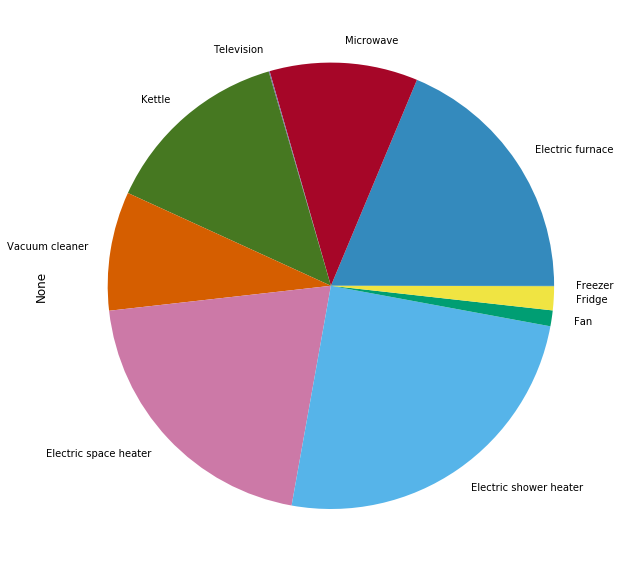

In [90]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Horno

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

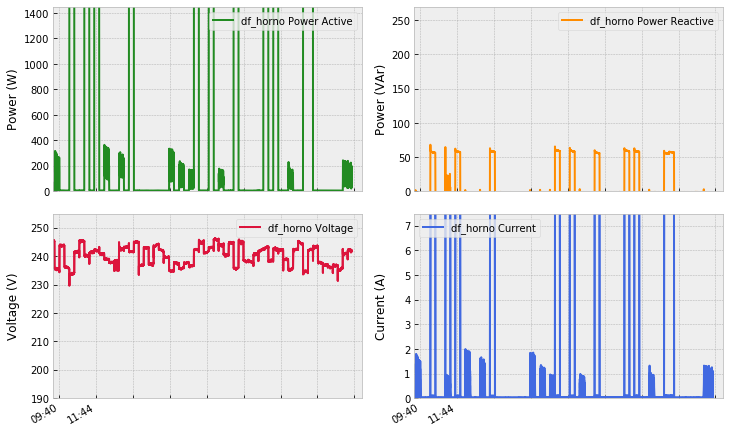

In [91]:
t0 = '2022-11-23 09:42:37+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:48+01:00' #tiempo final

df_vac = next(elec[2].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ef['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_horno Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ef['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_horno Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ef['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_horno Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ef['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_horno Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:44'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_horno.svg', bbox_inches='tight', transparent=True)
pass

Ahora vemos la grafica de una aspiradora cuyo consumo es de uno 3.5Amp y no presenta potencia reactiva apreciable

### Microondas

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 4 (Freezer)

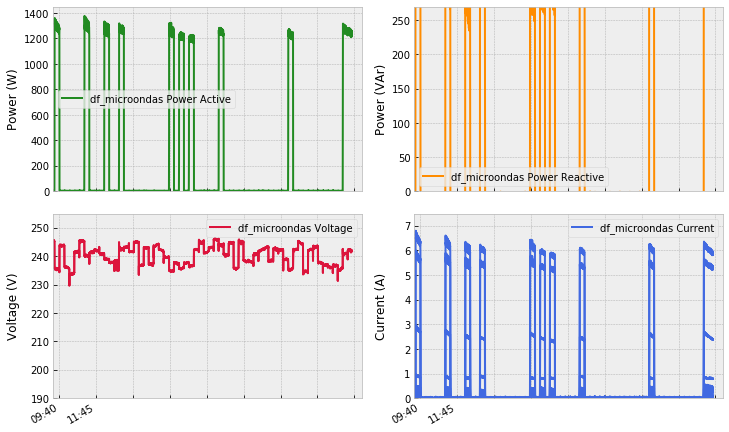

In [92]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final
df_mi = next(elec[3].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_mi['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_microondas Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_mi['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_microondas Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_mi['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_microondas Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_mi['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_microondas Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_microondas.svg', bbox_inches='tight', transparent=True)
pass

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

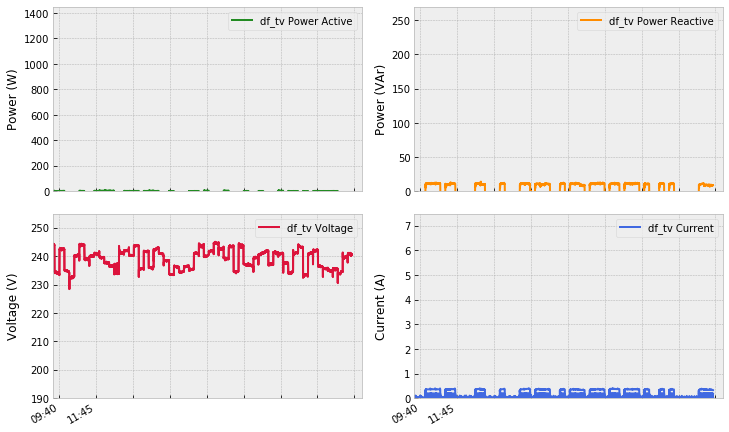

In [93]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final

df_tv = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

Como se deduce de los graficos , el hervidor esta compuesto unicamente por uan resistencia de alta potencia, motivo por el cual no presente medidas de potencia reactiva y todo sea potencia activa 

### Kettle

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

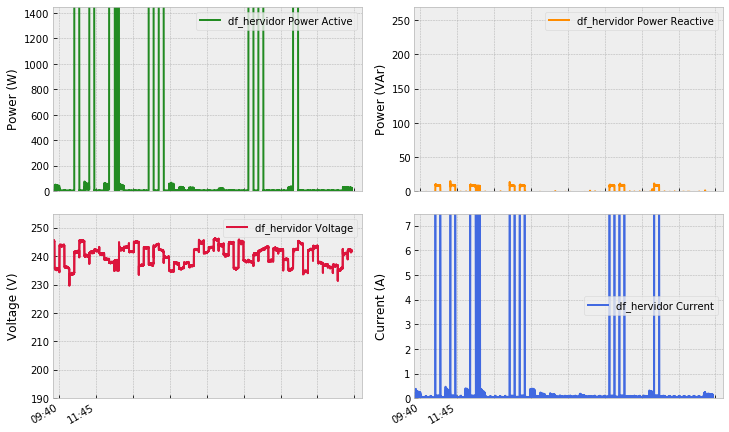

In [94]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final

df_ke = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ke['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_hervidor Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ke['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_hervidor Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ke['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_hervidor Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ke['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_hervidor Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_hervidor.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de una luminaria de bajo consumo en la que al llevar una fuente conmutada practicamente consume el mismo nivel de potencia activa que el de reactiva. Ademas queda registrado un poequeño pico de corriente justo en el momento de encendido. 

### Aspiradora

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

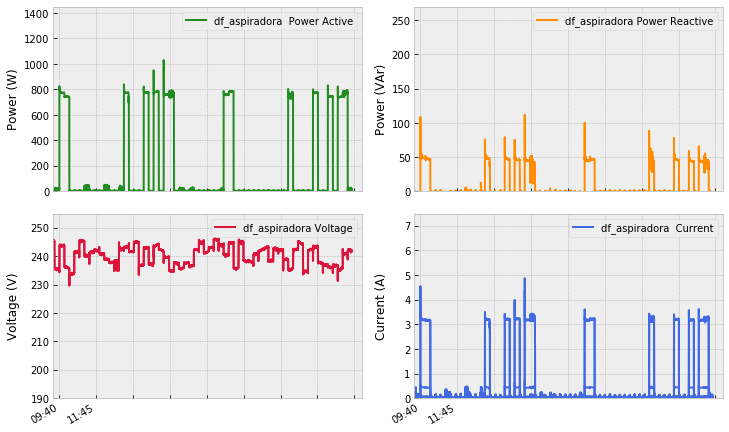

In [95]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vc ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_aspiradora  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vc ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_aspiradora Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vc ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_aspiradora Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vc ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_aspiradora  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_aspiradora.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de un pequeño ventilador cuyo consumo es casi inapreciable y no presenta energia reaciva. Es llamativo el hecho de que haya fluctuaciones apreciables en la grafica de la tension asi como  tambien un pequeño pico de corriente ( este hecho solo en el momento del arranque). 

## Estufa de aceite

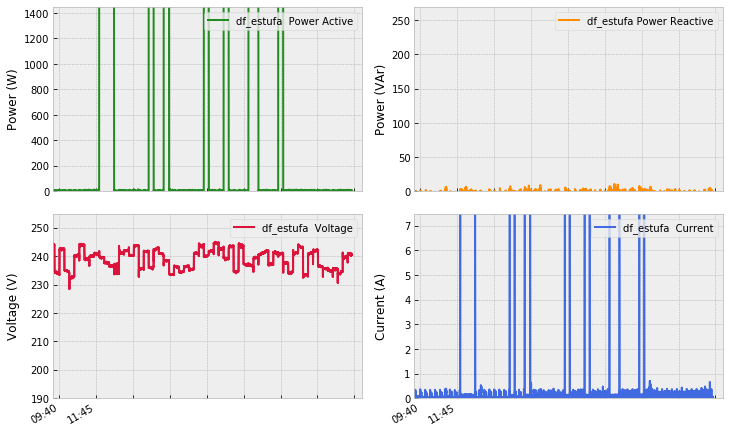

In [96]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_sh = next(elec[7].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sh ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_estufa  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sh ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_estufa Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sh ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_estufa  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sh ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_estufa  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_estufa.svg', bbox_inches='tight', transparent=True)
pass

### Calentador

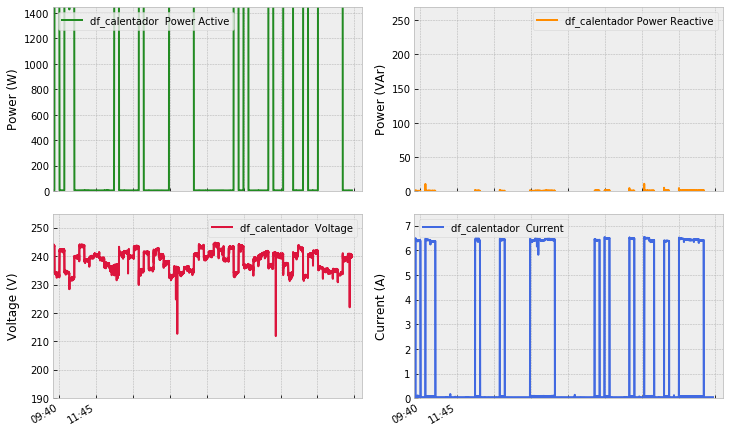

In [97]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_sho = next(elec[8].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sho ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_calentador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sho ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_calentador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sho ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_calentador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sho ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_calentador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_calentador.svg', bbox_inches='tight', transparent=True)
pass

### Ventilador

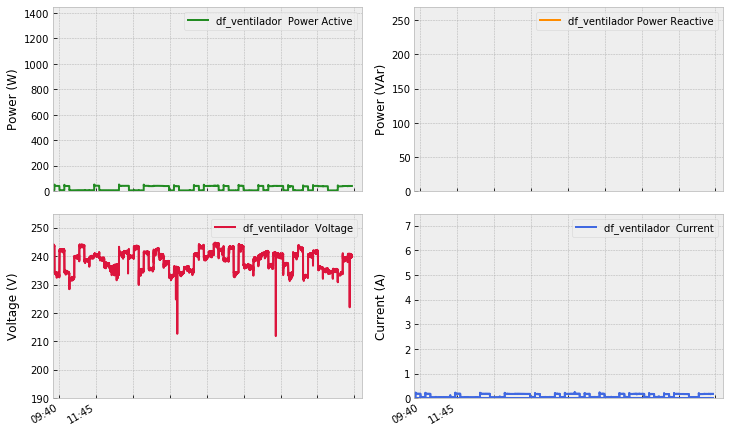

In [98]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_ventilador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_ventilador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_ventilador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_ventilador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_ventilador.svg', bbox_inches='tight', transparent=True)
pass

### Nevera

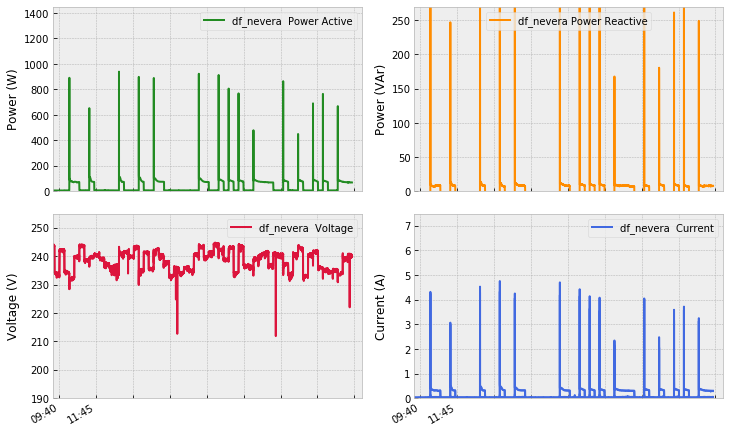

In [99]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_fri = next(elec[10].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fri ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_nevera  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fri ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_nevera Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fri ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_nevera  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fri ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_nevera  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Congelador

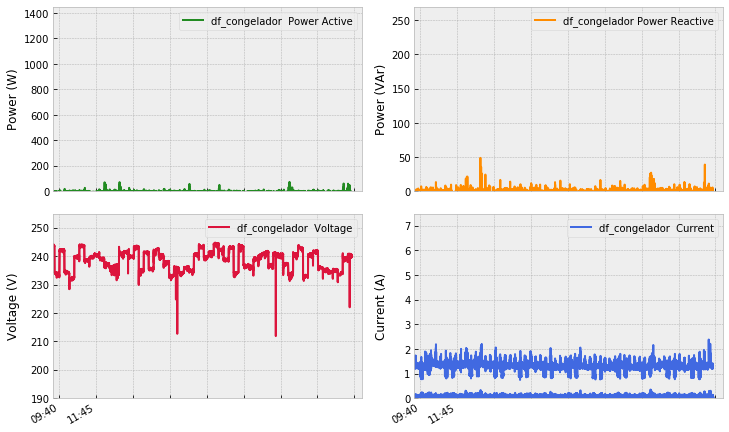

In [100]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_fre = next(elec[11].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fre ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_congelador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fre ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_congelador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fre ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_congelador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fre ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_congelador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_congelador.svg', bbox_inches='tight', transparent=True)
pass

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

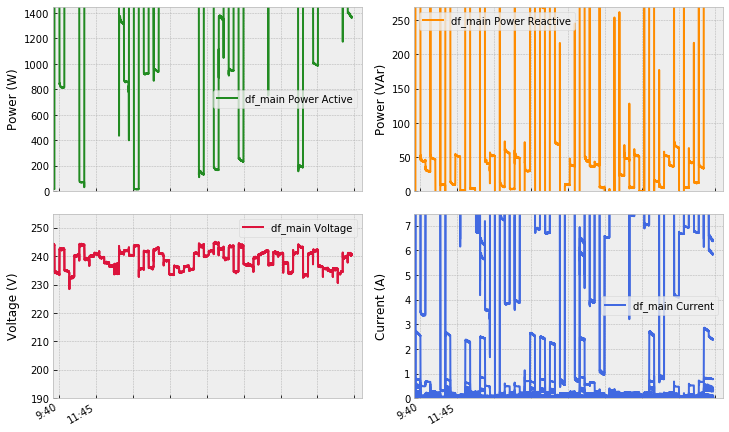

In [102]:
tt0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_main = next(elec[1].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['9:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_main.svg', bbox_inches='tight', transparent=True)
pass

Por ultimo vemos la grafica de un monitor cuyos resultado arroja tanto potencia activa como reactiva  ( por la fuente conmutada) pero ninguna fluctuacion en la tension ni en en la corriente 

### Trazar los electrodomésticos cuando estén en uso

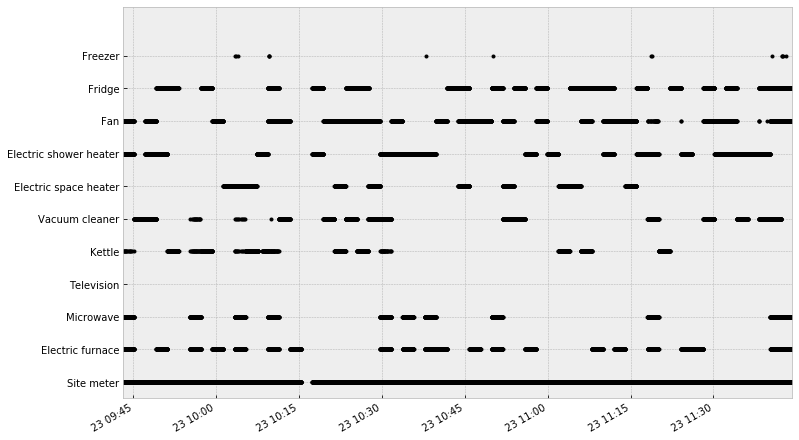

In [103]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

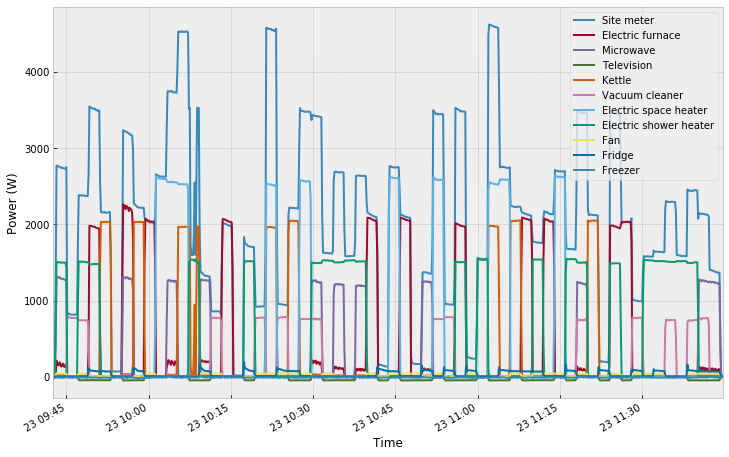

In [104]:
dsualmh.set_window(start='2022-11', end='2022-12')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [105]:
from pandas.plotting import autocorrelation_plot

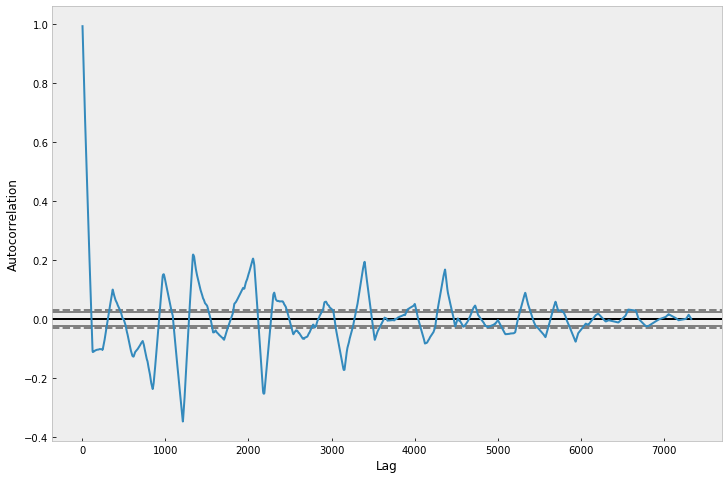

In [106]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [107]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

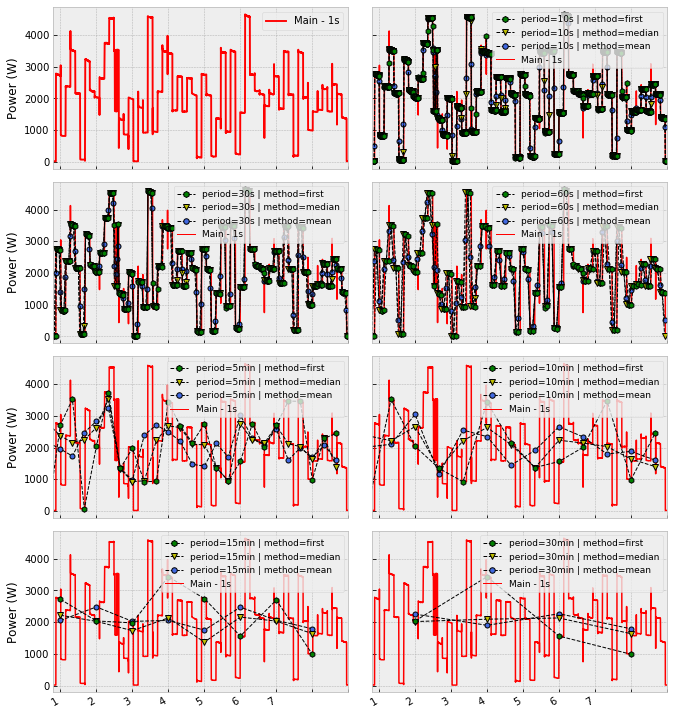

In [108]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:45:00+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

ax1.set(xlim=('2022-11-23 09:42:00+01:00','2022-11-23 11:45:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [109]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

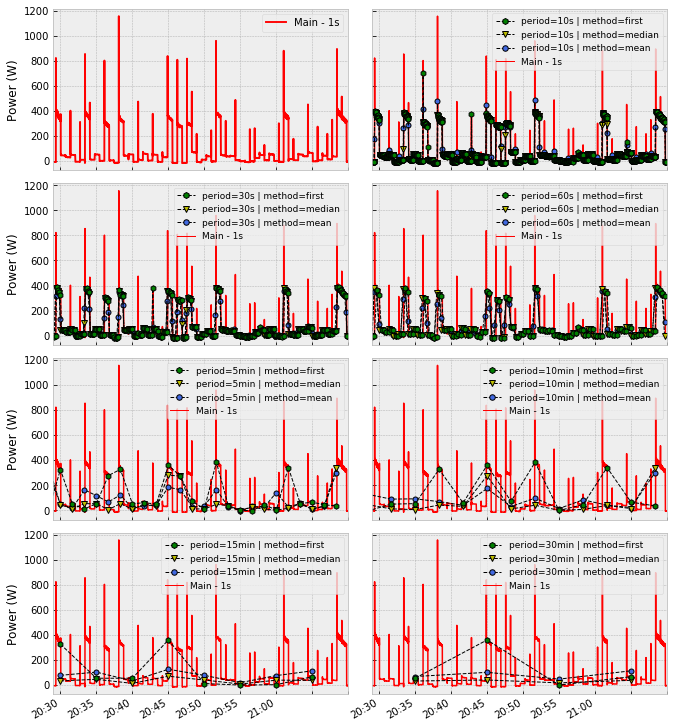

In [110]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:45:00+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    
ax1.set(xlim=('2022-11-23 09:42:00+01:00','2022-11-23 11:45:00+01:00'))
#ax1.set(xlim=('2021-11-10 18:00:00+01:00','2021-11-12 18:05:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass